# FASHION Product Data Set - Augustin FUCHS

##### Why did you choose this DataSet ?

I came to this course to learn a lot about what is a Data-Scientist. I am very interested about new way of computing in python so that is why I choose the Module: " Data Mining and Machine learning"

As I want to discover this subject but also to learn as much as possible, I decided to focus on images data-set.

I have chosen this Dataset because I was looking for an interesting data set, that will require that I challenge myself. The images are in large size, coloured so my Lab Tutor advised me to choose this one.

<em><u>Link to the dataset :</u></em>

https://www.kaggle.com/paramaggarwal/fashion-product-images-dataset

##### Difficulties visualizing the data 

As my data Set is mainly composed with images, (there is a CSV that summarize the data), there isn't that much to see in terms of numerical attributes. However, the last part of this portfolio is on the image pre-processing using different types of binarization

# Data Exploration and Visualization

## Setup

In [3]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [4]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [5]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import cv2
import pandas as pd
import urllib.request
from math import *
import seaborn as sn

In [6]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [7]:
#image lib import
from PIL import Image
# importing the module to count elapsed time
import timeit

In [8]:

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

<font color="darkblue">We get  a 4 layers Convultionnal Neural Network</font>

In [9]:
fashion_URL = 'xxxxxx'# insert the link to your dataset main foldersfashion_PATH = os.path.join(fashion_URL,"datasets", "Fashion", "fashion-dataset")
# fashion_URL = 'xxxxxx'# insert the link to your dataset main folders

`load_fashion_data` function loads the `fashion.csv` into a panda `dataframe`

In [9]:
def fetch_fashion_data(fashion_path=fashion_PATH):
    csv_path = os.path.join(fashion_path, "styles.csv")
    return pd.read_csv(csv_path) #, error_bad_lines=False) // This line is to avoid bad csv lines that ot fit all atributes

In [10]:
fashion = fetch_fashion_data() # "fashion" is a pandas DataFrame object containing all the data
fashion.head() # Display the top five rows of the DataFrame
#Q1 How many attribuites in the data set? Desribe the attribuites .

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


<font color="darkblue">We can observe that as the dataset is images, the numerical data will not be relevant. In our case we want to classify by article types</font>

In [11]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
fashion.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44423 entries, 0 to 44422
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44423 non-null  object 
 1   gender              44421 non-null  object 
 2   masterCategory      44421 non-null  object 
 3   subCategory         44421 non-null  object 
 4   articleType         44421 non-null  object 
 5   baseColour          44406 non-null  object 
 6   season              44400 non-null  object 
 7   year                44420 non-null  float64
 8   usage               44104 non-null  object 
 9   productDisplayName  44414 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.4+ MB


In [12]:
pd.set_option("display.max_rows", None)
arrayCat = fashion["articleType"].value_counts() # 

In [13]:
#value_counts = df['course_difficulty'].value_counts()

# converting to df and assigning new names to the columns
df_value_counts = pd.DataFrame(arrayCat)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['articleType', 'NbVal']
df_value_counts


,articleType,NbVal
0,Tshirts,7067
1,Shirts,3217
2,Casual Shoes,2844
3,Watches,2542
4,Sports Shoes,2036
5,Kurtas,1844
6,Tops,1762
7,Handbags,1759
8,Heels,1323
9,Sunglasses,1073


We can see that there is a lot of types (143 classes is a lot). For our training set we will take 20% of our dataset.
So we will need 20% of our main categories, let's take 10 fo them
 - Tshirts                      
 - Shirts
 - Casuals Shoes
 - Watches
 - Sports Shoes
 - Kurtas
 - Tops
 - Handbags
 - Heels
 - Sunglasses

In [14]:
# we will create an arra that will contain the name of the 10 biggest articleType
dataArticles = []
#loop throught the 10 first value of the sorted panda frame
for k in range(10):
    dataArticles.append(df_value_counts['articleType'][k])
#create a numpy array with the 10 articleType
dataArticles = np.array(dataArticles)
#print the array
dataArticles
    

array(['Tshirts', 'Shirts', 'Casual Shoes', 'Watches', 'Sports Shoes',
       'Kurtas', 'Tops', 'Handbags', 'Heels', 'Sunglasses'], dtype='<U12')

<font color="darkblue">We can observe that as the dataset is images, the numerical data will not be relevant. In our case we want to classify by article Type</font>

# Prepare the Data for Machine Learning Algorithms

In [15]:
fashion.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


## Data Cleaning


<font color="darkblue">This function import the images from the unzipped file, follwing the id given into the csv. However, not all the images were apparently not into the folder. </font>

<font color="darkblue">I had to deal with image presence test to get if this exista or not and avoid errors</font>

In [16]:
#define the image path
IMAGE_PATH = os.path.join(fashion_PATH,"images")
images_id = fashion[["id"]]
fashion_cleaned = np.array([])


In [17]:
#we assume that this class is working with RGB images and not Grayscale 
#Let's reduce the size by keeping the ratio
ImageW = int(975/15)
ImageH = int(1300/15)
class ImageData(object):
    def _init_(self,img_matrix):
        #init ImageData parameters
        self._img_matrix = img_matrix
    
    def getImgData(self,imgName):
        #define the image path
        img_path = os.path.join(IMAGE_PATH,imgName)        
        #open the image
        imgs = Image.open(img_path)
        imgs = cv2.imread(img_path)
        #resize the image with the original ratio
        #--imgs = imgs.resize((975, 1300),)
        imgs = cv2.resize(imgs, (ImageW, ImageH),interpolation=cv2.INTER_AREA)
        #put the image in the corre4ct pixel matyrix format
        imgs = cv2.cvtColor(imgs, cv2.COLOR_BGR2GRAY)#.COLOR_BGR2RGB)
        #store the image array to Numbpy array
        self.img_matrix = imgs # np.asarray(imgs)      
        
        #return self
        return self
    


In [18]:
#This function will create a dictionnary with all the selected attributes
#to check the size of each attributes
AttrDict = dict([])
for k in range(dataArticles.shape[0]):
    AttrDict[dataArticles[k]] = 0
AttrDict

{'Tshirts': 0,
 'Shirts': 0,
 'Casual Shoes': 0,
 'Watches': 0,
 'Sports Shoes': 0,
 'Kurtas': 0,
 'Tops': 0,
 'Handbags': 0,
 'Heels': 0,
 'Sunglasses': 0}

<font color="darkblue">This dictionnary allow to get almost the same amount of data for each class</font>

In [19]:
# string_print = f'{numbX}/{numbTT} - [{NumbEq}>{NumbDash}] - {NumbPerc}%'
## --- This function is helpfull
def dispPerc(x_actu, x_max):    
    numbX = f'{x_actu}'
    numbTT = f'{x_max}'
    NumbEq = ''
    NumbDash = ''
    while len(numbX) < len(numbTT):
        numbX = ' ' + numbX
    actual_perc = round((x_actu / x_max)*30)
    for k in range(actual_perc-1):
        NumbEq += '=' 
    for k in range(30 - 1 - actual_perc):
        NumbDash += '-'
    NumbPerc = round((x_actu / x_max)*100)
    string_print = f'{numbX}/{numbTT} - [{NumbEq}>{NumbDash}] - {NumbPerc}%'
    return string_print
    

We are now going to create a new panda frame with all the data that interested us

Also we need to deal with the size of the image and reduced to increase the computationnal speed

In [20]:
### we define the 3 new array we will use for our dataset sorted
arrId = []
arrPix, arrPix_small = [], []
arrMatR = []
arrMatG = []
arrMatB = []
arrType, arrType_small = [], []
def NewFashionFrame():
    #Create a timer to estamte cod running (last results 229.809 sec for 100 items)
    start = timeit.default_timer()
    #range for short data sorting
    DataRange = 40000#6693#fashion[['id']].shape[0]
    small_DataRange = 6000
    #Init Attributes Dictionnary
    #loop throught all the vale of the dataset
    for k in range(DataRange):
        for catArticle in dataArticles:    
            #Get the label to compare it
            ArticleTypeLabel = fashion[['articleType']].loc[k]['articleType']
            #check if the label is in our short list and we have less than TotalItems/TotalClasses values
            if catArticle == ArticleTypeLabel and AttrDict[ArticleTypeLabel] <= (int(DataRange/10) + 1):         
                #get the id from the master panda frame
                img_id = fashion[["id"]].loc[k]['id']
                # check if img exist                
                if os.path.isfile(os.path.join(IMAGE_PATH,img_id+'.jpg')):    
                    #add the id to the array
                    arrId.append(img_id)
                    #add the articleType to the corresponding array
                    arrType.append(catArticle)
                    #init the class image
                    img = ImageData()
                    #get image data matrix pixels and size
                    img = img.getImgData((img_id +'.jpg'))
                    #add pixels and size to the corrsponding arrays
                    img = img.img_matrix
                    arrPix.append(img)
                    # creating the small dataframe
                    if k < small_DataRange:
                        # getting img into a small array 
                        arrPix_small.append(img)
                        # getting article into a small array
                        arrType_small.append(catArticle)
                    #terminate the for loop s we found the category                
                    # print('Getting Data from {}/{}...'.format(k,DataRange))
                    print(dispPerc(k, DataRange),end='\r')
                    #Exit The for
                else:
                    print('Image {} does not exist'.format(k,DataRange),end='\r')
                break
        
       
    end = timeit.default_timer()# printing the execution time by subtracting
    # the time before the function from
    # the time after the function
    #arrPix = np.array(arrPix)
    #arrMatR = np.array(arrMatR)
    #arrMatG = np.array(arrMatG)
    #arrMatB = np.array(arrMatB)
    
    df_from_arr = pd.DataFrame(data=[ arrType, arrPix]).T
    df_from_arr = df_from_arr.reset_index()
    df_from_arr.columns = ['index','articleType','Gray_Matrice']
    del df_from_arr['index']
    # small dataframe
    small_from_arr = pd.DataFrame(data=[ arrType_small, arrPix_small]).T
    small_from_arr = small_from_arr.reset_index()
    small_from_arr.columns = ['index','articleType','Gray_Matrice']
    del small_from_arr['index']
    #del df_from_arr['id'] #for debbugin id was usefull
    print('The image data scraping took : {} sec'.format(round((end-start),3)))
    return df_from_arr, small_from_arr


In [21]:
def NewFashionDS():
    #if os.path.exists(csv_PATH):   
      #  return pd.read_csv(csv_PATH)
    #else:
    df_from_arr = NewFashionFrame()
    #df_from_arr.to_csv(csv_PATH)
    return df_from_arr
    
extended_Fashion, newFashion = NewFashionDS()

The image data scraping took : 936.639 sec==>] - 100%


In [22]:
#empty the array at the end
arrId = []
arrPix = []
arrType = []

newFashion.head(10)

,articleType,Gray_Matrice
0,Shirts,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1,Watches,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,Tshirts,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3,Tshirts,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
4,Shirts,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
5,Shirts,"[[254, 255, 255, 255, 255, 254, 254, 254, 254,..."
6,Watches,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
7,Casual Shoes,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
8,Handbags,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
9,Shirts,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


<font color="darkblue">Here is the new dataset created</font>

In [23]:
newFashion.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   articleType   3415 non-null   object
 1   Gray_Matrice  3415 non-null   object
dtypes: object(2)
memory usage: 53.5+ KB


In [24]:
extended_Fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22905 entries, 0 to 22904
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   articleType   22905 non-null  object
 1   Gray_Matrice  22905 non-null  object
dtypes: object(2)
memory usage: 358.0+ KB


<font color="darkblue">Here is the comparaison between the 2 dataset we cerated with a small and a big dataset</font>

<font color="darkblue">The big dataset has close than 10 times more data</font>

<h4><font color='darkred'> Handling Text and Categorical Attributes</font></h3>

In [25]:
fashion_cat = newFashion[["articleType"]]
fashion_cat.head(10)  # look at the value of  'ocean_proximity' for the first 10 instances 

,articleType
0,Shirts
1,Watches
2,Tshirts
3,Tshirts
4,Shirts
5,Shirts
6,Watches
7,Casual Shoes
8,Handbags
9,Shirts


In [26]:
from sklearn.preprocessing import OrdinalEncoder
# sklearn OrdinalEncoder class is used to convert categorical values to numbers
ordinal_encoder = OrdinalEncoder() 
fashion_cat_encoded = ordinal_encoder.fit_transform(fashion_cat)
newFashion['articleType'] = fashion_cat_encoded
fashion_cat_encoded[:10] # Lists the numerical values that correspond to the categorical attribute


array([[4.],
       [9.],
       [8.],
       [8.],
       [4.],
       [4.],
       [9.],
       [0.],
       [1.],
       [4.]])

We now need to shuffle our dataset 

<font color="darkblue">We obtain now fully numerical data (our traget data), we can shuffle our data </font>

In [27]:
newFashion = newFashion.sample(frac=1)#.reset_index(drop=True)
newFashion.head(10)

,articleType,Gray_Matrice
69,1.0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1232,6.0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2958,7.0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2426,3.0,"[[252, 252, 252, 252, 252, 252, 252, 252, 252,..."
2057,4.0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1612,7.0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2727,2.0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
506,8.0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
302,4.0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3117,6.0,"[[254, 254, 254, 254, 254, 254, 254, 254, 254,..."


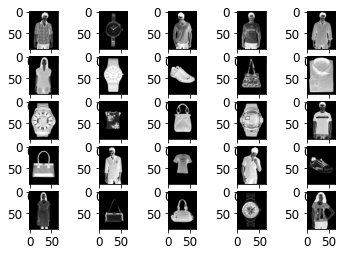

In [28]:
f, axarr = plt.subplots(5,5)
plt_count = 0
for i in range(5):
    for j in range(5):
        axarr[i,j].imshow(newFashion['Gray_Matrice'][plt_count],cmap=mpl.cm.binary)
        plt_count = plt_count + 1

# Image Visualization and Processing Part 2

In this part we are going to visualiaze and process ou image

The goal is to transform all of our pixels matrix to attriubutes which can be treated and computaed by Machine learning algorythm. 

In [29]:
print(newFashion['Gray_Matrice'][0].shape)
print(newFashion['Gray_Matrice'][1].shape)
print(newFashion['Gray_Matrice'][8].shape)
print(newFashion['Gray_Matrice'].shape)

(86, 65)
(86, 65)
(86, 65)
(3415,)


We are getting the size of our images

In [30]:
X = newFashion['Gray_Matrice']
y = newFashion['articleType']
print('The total lenth of our dataset is :',X.shape[0])

The total lenth of our dataset is : 3415


from sklearn.datasets import load_digits
digits = load_digits()
data = digits.data
data
#newFashion['Gray_Matrice'].head(10)

We now normalize the data of our matrices

In [31]:
y = y.astype(np.uint8)

In [32]:
X_flatten = []
for k in range(X.shape[0]):
    X_flatten.append(X[k].flatten())
X_flattend = np.array(X_flatten)


In [33]:
X_flattend = X_flattend.astype('float') / 255

In [34]:
Train_Offset =int(X.shape[0]*0.8)

In [35]:
X_train, X_test, y_train, y_test = X_flatten[:Train_Offset], X_flatten[Train_Offset:], y[:Train_Offset], y[Train_Offset] 

In [36]:
y_train_5 = (y_train == 5) # True for all Sports Shoes, False for all other Clothes
y_test_5 = (y_test == 5)

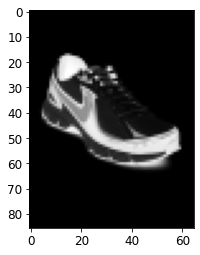

In [37]:
def Get_5_value():
    k=0
    while y[k] != 5 and k < y.shape[0]:
        k = k+1
        
    return k
indexer_5 = Get_5_value()
some_5_class = X_train[indexer_5]
some_5_class_show = X[indexer_5]
plt.imshow(some_5_class_show, cmap=mpl.cm.binary)
plt.show()

In [38]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [39]:
sgd_clf.predict([some_5_class]) #The classifier guesses that this image represents a 5 (True). 

array([False])

# Performance Measures 

## Base Estimator

$\large{P(x|y) = \frac{P(y|x) . P(x)}{P(y)}}$

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90669594, 0.91108672, 0.90989011])

 A classifier that just classifies every single image in the “not-5” class

In [41]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

Let's check the accuracy 

In [42]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90010977, 0.9143798 , 0.92087912])

## Confusion Matrix

In [43]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [44]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train_5, y_train_pred)
TP = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TN = conf_matrix[1][1]
conf_matrix

array([[2483,    8],
       [ 240,    1]], dtype=int64)

In [45]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[2491,    0],
       [   0,  241]], dtype=int64)

## Precision and Recall

$\large{precision = \frac{TP}{TP+FP}}$

The precision is an indicator ratio that give the accuracy of the positive predictions

In [46]:
from sklearn.metrics import precision_score, recall_score

#precision_score(y_train_5, y_train_pred)

In [47]:
pres = TP / (TP + FP)
pres

0.9967884383781613

So in our case 92,3% a time a value is truly positive 

$\large{recall = \frac{TP}{TP+FN}}$

The recall value is the amont of true positive value 

In [48]:
rcall = TP / (TP + FN)
rcall

0.9118619170033052

So 91% of our values are correct

$\large{ F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 \times\frac{precision \times recall}{precision + recall} = \frac{TP}{TP + \frac{FN+FP}{2}} }$

In [49]:
2*((pres*rcall)/(pres+rcall))

0.9524357499041043

F1 score is a easy to ready indicator that alow to compare reulst between our classifier

## Precision/Recall Trade-off

In [50]:
y_scores = sgd_clf.decision_function([some_5_class])
y_scores

array([-3530791.48727554])

In [51]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [52]:
y_some_digit_pred

array([False])

In [53]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [54]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [55]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
thresholds.shape

(2721,)

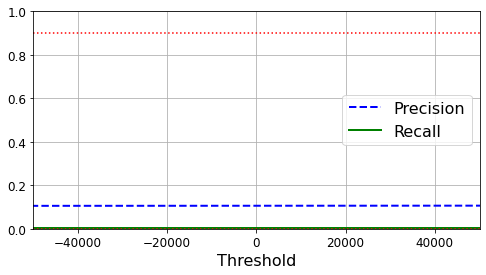

In [56]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.80)-1]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions , recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

In [57]:
(y_train_pred == (y_scores > 0)).all()

True

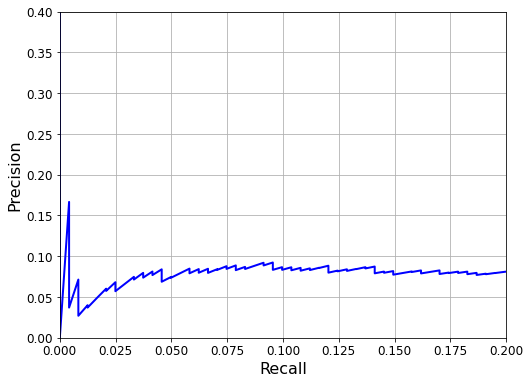

In [58]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 0.2, 0, 0.4])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

In [59]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)-1]

In [60]:
threshold_90_precision

5392385.857058067

In [61]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [62]:
conf_matrix_90 = confusion_matrix(y_train_5, y_train_pred_90)
new_TP = conf_matrix_90[0][0]
new_FP = conf_matrix_90[0][1]
new_FN = conf_matrix_90[1][0]
new_TN = conf_matrix_90[1][1]

In [63]:
new_pres = new_TP / (new_TP + new_FP)
new_pres

0.9995985547972702

$\large{recall = \frac{TP}{TP+FN}}$

In [64]:
new_rcall = new_TP / (new_TP + new_FN)
new_rcall

0.9117539362870744

# The ROC curves

In [65]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

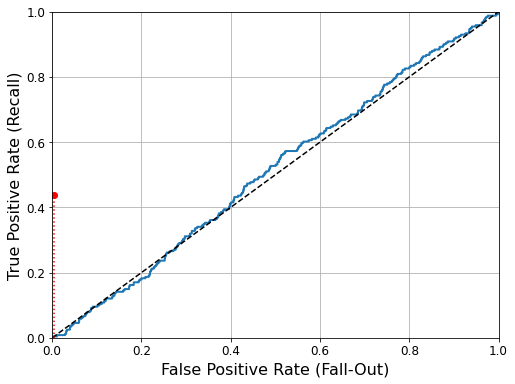

In [66]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [67]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.5110105924898098

 ## RandomForestClassifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [69]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

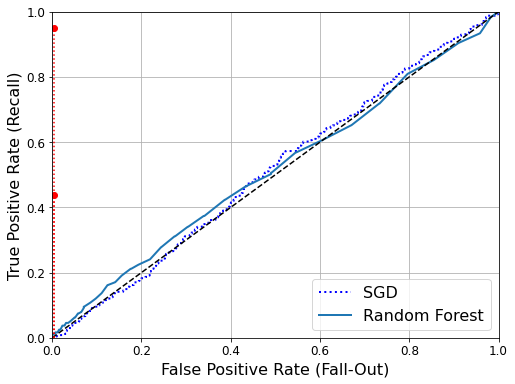

In [70]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [71]:
roc_auc_score(y_train_5, y_scores_forest)

0.5127196496599375

In [72]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.3

In [73]:
recall_score(y_train_5, y_train_pred_forest)

0.012448132780082987

# Feature Correlation

In [74]:
LabelArr =[]
for Yshp in range(X[0].shape[0]):
    for Xshp in range(X[0].shape[1]):
        LabelArr.append('x.{},y.{}'.format(Xshp,Yshp))
len(LabelArr)

5590

In [75]:
len(X_flattend)

3415

In [76]:
#i = y pixels
pixelk = []
flat_Fashion = pd.DataFrame(columns=LabelArr)
start = timeit.default_timer()# printing the execution time by subtracting
for i in range(X.shape[0]):
    flat_Fashion.loc[i] = X_flattend[i]
#ADD gray matrice
flat_Fashion['G_matrix'] = newFashion['Gray_Matrice']
end = timeit.default_timer()# printing the execution time by subtracting
print('The flat Image Dataset took : {} sec, to concatenate'.format(round((end-start),3)))

The flat Image Dataset took : 59.776 sec, to concatenate


In [77]:
#flat_Fashion[X.shape[0] + 1] = newFashion['articleType']
#
flat_Fashion['target'] = y
#flat_Fashion = df2

In [78]:
flat_Fashion.head(10)

,"x.0,y.0","x.1,y.0","x.2,y.0","x.3,y.0","x.4,y.0","x.5,y.0","x.6,y.0","x.7,y.0","x.8,y.0","x.9,y.0",...,"x.57,y.85","x.58,y.85","x.59,y.85","x.60,y.85","x.61,y.85","x.62,y.85","x.63,y.85","x.64,y.85",G_matrix,target
0,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",4
1,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",9
2,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",8
3,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",8
4,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",4
5,0.996078,1.0,1.0,1.0,1.0,0.996078,0.996078,0.996078,0.996078,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[254, 255, 255, 255, 255, 254, 254, 254, 254,...",4
6,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",9
7,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0
8,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",1
9,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",4


In [79]:
CorrMatrix = []
start = timeit.default_timer()# printing the execution time by subtracting
#loop throught all the pixels columns
for yi in range(X[0].shape[0]):
    for xi in range(X[0].shape[1]):
        #generate the correlation value
        correlation = flat_Fashion['x.{},y.{}'.format(xi,yi)].corr(y)
        #add the correlation value to the general array
        CorrMatrix.append(correlation)

end = timeit.default_timer()# printing the execution time by subtracting
print('The correlation matrice took : {} sec, to generate'.format(round((end-start),3)))

The correlation matrice took : 3.759 sec, to generate


## Sub - DataSet (max 100)

In [80]:
CorrMatrix = np.array(CorrMatrix)
CorrMatrixCopy = np.absolute(CorrMatrix)

In [81]:
SubSet_Size = 1000

In [82]:
Corr_Arg = []
old_arg = -1
count_del = 0
for k in range(SubSet_Size):
    if np.argmax(CorrMatrixCopy) == old_arg:
        print('Items in double :',np.argmax(CorrMatrixCopy))
        while(np.argmax(CorrMatrixCopy) == old_arg):
            CorrMatrixCopy = np.delete(CorrMatrixCopy , np.argmax(CorrMatrixCopy))

    Corr_Arg.append(np.argmax(CorrMatrixCopy))
    CorrMatrixCopy = np.delete(CorrMatrixCopy , np.argmax(CorrMatrixCopy))
    count_del = count_del + 1
    old_arg = np.argmax(CorrMatrixCopy)
        

Items in double : 1593
Items in double : 1527
Items in double : 941
Items in double : 1524
Items in double : 1394
Items in double : 1584
Items in double : 1647
Items in double : 1198
Items in double : 4695
Items in double : 4695
Items in double : 4690
Items in double : 4819
Items in double : 1132
Items in double : 1325
Items in double : 4817
Items in double : 4877
Items in double : 1515
Items in double : 1324
Items in double : 1512
Items in double : 4683
Items in double : 4868
Items in double : 1001
Items in double : 1129
Items in double : 4799
Items in double : 4743
Items in double : 1001
Items in double : 4854
Items in double : 4678
Items in double : 4794
Items in double : 4848
Items in double : 1568
Items in double : 4788
Items in double : 1254
Items in double : 4730
Items in double : 4841
Items in double : 1693
Items in double : 4837
Items in double : 4725
Items in double : 4778
Items in double : 1061
Items in double : 4608
Items in double : 4719
Items in double : 4608
Items in dou

Items in double : 1702
Items in double : 1040
Items in double : 3172
Items in double : 1036
Items in double : 3674
Items in double : 3677
Items in double : 4227
Items in double : 2534
Items in double : 759
Items in double : 2801
Items in double : 672
Items in double : 4155
Items in double : 985
Items in double : 447
Items in double : 3664
Items in double : 292
Items in double : 2525
Items in double : 1079
Items in double : 1430
Items in double : 2018
Items in double : 3654
Items in double : 3089
Items in double : 2157
Items in double : 3055
Items in double : 3200
Items in double : 4171
Items in double : 3645
Items in double : 3956
Items in double : 4227
Items in double : 1402
Items in double : 3197
Items in double : 4222
Items in double : 2154
Items in double : 4238
Items in double : 1425
Items in double : 291
Items in double : 2617
Items in double : 4101
Items in double : 4169
Items in double : 2149
Items in double : 4107
Items in double : 4285
Items in double : 3978
Items in double :

In [83]:
CorrMatrixCopy = np.delete(CorrMatrixCopy , np.argmax(CorrMatrixCopy))
np.amin(CorrMatrixCopy), np.argmin(CorrMatrixCopy)

(1.928116752108302e-06, 2107)

In [84]:
new_col = []
new_Label = []
for k in range(len(Corr_Arg)):
    new_Label.append('x.{},y.{}'.format((Corr_Arg[k] % X[0].shape[1]),int(Corr_Arg[k] / X[0].shape[1])))
    new_col.append(np.array(flat_Fashion.loc[:,new_Label[k]]))
new_Label

['x.31,y.14',
 'x.31,y.14',
 'x.31,y.22',
 'x.28,y.24',
 'x.30,y.21',
 'x.28,y.22',
 'x.23,y.25',
 'x.29,y.15',
 'x.15,y.72',
 'x.13,y.74',
 'x.32,y.13',
 'x.13,y.72',
 'x.8,y.75',
 'x.7,y.75',
 'x.7,y.74',
 'x.22,y.22',
 'x.9,y.72',
 'x.32,y.13',
 'x.5,y.72',
 'x.3,y.72',
 'x.58,y.73',
 'x.58,y.73',
 'x.62,y.72',
 'x.0,y.72',
 'x.48,y.74',
 'x.56,y.72',
 'x.9,y.25',
 'x.53,y.72',
 'x.28,y.14',
 'x.51,y.72',
 'x.28,y.14',
 'x.53,y.72',
 'x.51,y.72',
 'x.32,y.74',
 'x.40,y.73',
 'x.31,y.13',
 'x.47,y.72',
 'x.18,y.18',
 'x.1,y.26',
 'x.54,y.71',
 'x.4,y.24',
 'x.40,y.72',
 'x.13,y.21',
 'x.23,y.15',
 'x.52,y.70',
 'x.52,y.70',
 'x.63,y.24',
 'x.60,y.25',
 'x.1,y.75',
 'x.50,y.70',
 'x.58,y.74',
 'x.62,y.24',
 'x.46,y.70',
 'x.56,y.74',
 'x.46,y.70',
 'x.57,y.25',
 'x.54,y.26',
 'x.3,y.23',
 'x.29,y.71',
 'x.46,y.74',
 'x.8,y.21',
 'x.3,y.22',
 'x.9,y.20',
 'x.53,y.24',
 'x.47,y.73',
 'x.35,y.74',
 'x.20,y.15',
 'x.30,y.70',
 'x.57,y.22',
 'x.32,y.8',
 'x.50,y.72',
 'x.23,y.74',
 'x.11,y

In [85]:
classified_Fashion_100 = pd.DataFrame(columns=new_Label)
start = timeit.default_timer()# printing the execution time by subtracting
for i in range(len(new_col)):
    classified_Fashion_100[new_Label[i]] = new_col[i]
end = timeit.default_timer()# printing the execution time by subtracting
print('The flat classified_Fashion_100 Dataset took : {} sec, to concatenate'.format(round((end-start),3)))

The flat classified_Fashion_100 Dataset took : 10.732 sec, to concatenate


In [86]:
new_Label_60 = []
for k in range(int(SubSet_Size*2/3)):
    new_Label_60.append(new_Label[k])
    
classified_Fashion_60 = pd.DataFrame(columns=new_Label_60)

start = timeit.default_timer()# printing the execution time by subtracting
for i in range(len(new_Label_60)):
    classified_Fashion_60[new_Label_60[i]] = new_col[i]
end = timeit.default_timer()# printing the execution time by subtracting
print('The flat classified_Fashion_60 Dataset took : {} sec, to concatenate'.format(round((end-start),3)))

The flat classified_Fashion_60 Dataset took : 5.056 sec, to concatenate


In [87]:
new_Label_30 = []
for k in range(int(SubSet_Size/3)):
    new_Label_30.append(new_Label[k])
    
classified_Fashion_30 = pd.DataFrame(columns=new_Label_30)

start = timeit.default_timer()# printing the execution time by subtracting
for i in range(len(new_Label_30)):
    classified_Fashion_30[new_Label[i]] = new_col[i]
end = timeit.default_timer()# printing the execution time by subtracting
print('The flat classified_Fashion_30 Dataset took : {} sec, to concatenate'.format(round((end-start),3)))

The flat classified_Fashion_30 Dataset took : 1.325 sec, to concatenate


In [88]:
classified_Fashion_100.head(10)

,"x.31,y.14","x.31,y.14","x.31,y.22","x.28,y.24","x.30,y.21","x.28,y.22","x.23,y.25","x.29,y.15","x.15,y.72","x.13,y.74",...,"x.27,y.17","x.35,y.23","x.31,y.20","x.47,y.9","x.36,y.28","x.7,y.5","x.30,y.18","x.18,y.54","x.11,y.22","x.28,y.22"
0,0.639216,0.639216,0.584314,0.262745,0.639216,0.152941,0.756863,0.631373,0.952941,0.815686,...,1.000000,0.752941,0.690196,1.00000,0.647059,1.0,0.713725,0.584314,1.000000,0.152941
1,0.847059,0.847059,0.631373,0.800000,0.870588,0.901961,0.800000,0.850980,1.000000,1.000000,...,1.000000,0.729412,0.862745,1.00000,0.901961,1.0,0.854902,0.925490,1.000000,0.901961
2,0.592157,0.592157,0.368627,0.690196,0.529412,0.501961,0.823529,0.737255,0.564706,1.000000,...,0.839216,0.250980,0.560784,1.00000,0.478431,1.0,0.721569,1.000000,1.000000,0.501961
3,0.462745,0.462745,0.635294,0.435294,0.611765,0.407843,1.000000,0.607843,0.741176,0.537255,...,0.439216,0.658824,0.568627,1.00000,0.843137,1.0,0.415686,0.513725,1.000000,0.407843
4,0.741176,0.741176,0.658824,0.470588,0.623529,0.674510,0.647059,0.654902,0.788235,0.780392,...,1.000000,0.537255,0.603922,1.00000,0.705882,1.0,0.643137,0.274510,1.000000,0.674510
5,0.800000,0.800000,0.552941,0.239216,0.317647,0.239216,0.996078,0.690196,0.776471,0.854902,...,0.262745,0.737255,0.788235,1.00000,0.580392,1.0,0.796078,0.580392,0.996078,0.239216
6,0.239216,0.239216,0.121569,0.074510,0.180392,0.145098,0.145098,0.243137,1.000000,1.000000,...,0.270588,0.133333,0.192157,1.00000,0.074510,1.0,0.247059,0.098039,1.000000,0.145098
7,1.000000,1.000000,1.000000,0.988235,1.000000,1.000000,0.180392,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
8,0.941176,0.941176,1.000000,0.749020,1.000000,0.823529,1.000000,0.588235,1.000000,1.000000,...,1.000000,0.596078,1.000000,1.00000,0.705882,1.0,0.878431,0.682353,1.000000,0.823529
9,0.286275,0.286275,0.329412,0.337255,0.278431,0.368627,0.309804,0.200000,0.250980,0.254902,...,0.305882,0.298039,0.290196,0.07451,0.313725,1.0,0.290196,0.380392,0.282353,0.368627


In [89]:
classified_Fashion_60.head(10)

,"x.31,y.14","x.31,y.14","x.31,y.22","x.28,y.24","x.30,y.21","x.28,y.22","x.23,y.25","x.29,y.15","x.15,y.72","x.13,y.74",...,"x.53,y.21","x.53,y.28","x.60,y.20","x.3,y.56","x.46,y.62","x.5,y.49","x.48,y.61","x.52,y.17","x.47,y.61","x.25,y.33"
0,0.639216,0.639216,0.584314,0.262745,0.639216,0.152941,0.756863,0.631373,0.952941,0.815686,...,1.000000,1.000000,1.0,1.0,0.925490,1.0,0.537255,1.000000,0.482353,0.505882
1,0.847059,0.847059,0.631373,0.800000,0.870588,0.901961,0.800000,0.850980,1.000000,1.000000,...,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.000000,0.929412
2,0.592157,0.592157,0.368627,0.690196,0.529412,0.501961,0.823529,0.737255,0.564706,1.000000,...,1.000000,1.000000,1.0,1.0,0.980392,1.0,0.345098,1.000000,0.972549,0.623529
3,0.462745,0.462745,0.635294,0.435294,0.611765,0.407843,1.000000,0.607843,0.741176,0.537255,...,1.000000,1.000000,1.0,1.0,0.992157,1.0,0.533333,1.000000,0.435294,0.800000
4,0.741176,0.741176,0.658824,0.470588,0.623529,0.674510,0.647059,0.654902,0.788235,0.780392,...,1.000000,1.000000,1.0,1.0,0.674510,1.0,0.403922,1.000000,0.988235,0.505882
5,0.800000,0.800000,0.552941,0.239216,0.317647,0.239216,0.996078,0.690196,0.776471,0.854902,...,1.000000,1.000000,1.0,1.0,0.549020,1.0,0.839216,1.000000,0.752941,0.368627
6,0.239216,0.239216,0.121569,0.074510,0.180392,0.145098,0.145098,0.243137,1.000000,1.000000,...,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.000000,0.070588
7,1.000000,1.000000,1.000000,0.988235,1.000000,1.000000,0.180392,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.000000,0.109804
8,0.941176,0.941176,1.000000,0.749020,1.000000,0.823529,1.000000,0.588235,1.000000,1.000000,...,1.000000,1.000000,1.0,1.0,0.450980,1.0,0.674510,1.000000,0.623529,0.760784
9,0.286275,0.286275,0.329412,0.337255,0.278431,0.368627,0.309804,0.200000,0.250980,0.254902,...,0.286275,0.368627,1.0,1.0,0.301961,1.0,0.317647,0.305882,0.309804,0.121569


In [90]:
classified_Fashion_30.head(10)

,"x.31,y.14","x.31,y.14","x.31,y.22","x.28,y.24","x.30,y.21","x.28,y.22","x.23,y.25","x.29,y.15","x.15,y.72","x.13,y.74",...,"x.51,y.30","x.34,y.49","x.41,y.22","x.46,y.65","x.36,y.47","x.20,y.66","x.30,y.5","x.38,y.67","x.9,y.7","x.18,y.64"
0,0.639216,0.639216,0.584314,0.262745,0.639216,0.152941,0.756863,0.631373,0.952941,0.815686,...,1.000000,0.729412,1.000000,0.439216,0.580392,0.694118,0.686275,0.482353,1.0,0.321569
1,0.847059,0.847059,0.631373,0.800000,0.870588,0.901961,0.800000,0.850980,1.000000,1.000000,...,1.000000,0.929412,1.000000,1.000000,0.921569,1.000000,0.839216,1.000000,1.0,1.000000
2,0.592157,0.592157,0.368627,0.690196,0.529412,0.501961,0.823529,0.737255,0.564706,1.000000,...,1.000000,0.592157,1.000000,0.847059,0.533333,0.411765,0.011765,0.384314,1.0,0.600000
3,0.462745,0.462745,0.635294,0.435294,0.611765,0.407843,1.000000,0.607843,0.741176,0.537255,...,1.000000,0.776471,1.000000,1.000000,0.694118,0.635294,0.098039,0.733333,1.0,0.796078
4,0.741176,0.741176,0.658824,0.470588,0.623529,0.674510,0.647059,0.654902,0.788235,0.780392,...,0.494118,0.482353,0.992157,0.345098,0.501961,0.431373,0.168627,0.431373,1.0,0.690196
5,0.800000,0.800000,0.552941,0.239216,0.317647,0.239216,0.996078,0.690196,0.776471,0.854902,...,1.000000,0.364706,0.278431,0.372549,0.380392,0.341176,0.262745,0.376471,1.0,0.337255
6,0.239216,0.239216,0.121569,0.074510,0.180392,0.145098,0.145098,0.243137,1.000000,1.000000,...,1.000000,0.058824,0.235294,1.000000,0.137255,0.231373,0.729412,0.129412,1.0,1.000000
7,1.000000,1.000000,1.000000,0.988235,1.000000,1.000000,0.180392,1.000000,1.000000,1.000000,...,1.000000,0.239216,1.000000,1.000000,0.203922,1.000000,1.000000,1.000000,1.0,1.000000
8,0.941176,0.941176,1.000000,0.749020,1.000000,0.823529,1.000000,0.588235,1.000000,1.000000,...,1.000000,0.498039,1.000000,0.552941,0.713725,0.631373,1.000000,0.352941,1.0,0.580392
9,0.286275,0.286275,0.329412,0.337255,0.278431,0.368627,0.309804,0.200000,0.250980,0.254902,...,0.313725,0.290196,0.325490,0.290196,0.345098,0.262745,0.078431,0.278431,1.0,0.188235


# Naives Bayer Classifier 

In [91]:
target=flat_Fashion.target
inputs=classified_Fashion_100 #.drop('target',axis='columns') # or classified_Fashion_100

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [93]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [94]:
model.fit(X_train, y_train)

GaussianNB()

In [95]:
naives_score = model.score(X_train, y_train)
naives_score

0.4158125915080527

In [96]:
model.predict(X_test[:10])

array([3, 2, 3, 6, 3, 3, 9, 3, 2, 3], dtype=uint8)

In [97]:
y_test[:10]

1495    9
1392    5
3002    8
2794    6
3249    7
996     3
1816    3
2610    1
3280    0
1695    4
Name: target, dtype: uint8

# PART II - Clustering

<font color='green'>-1-   Using the same data set, use k-means clustering to find clusters in your data set. Evaluate the
accuracy of this clustering, visualize the clusters, make conclusions</font>

<font color='green'>-2-   For top marks, try different clustering algorithms for hard and soft clustering, such as EM, GMM,
hierarchical clustering or any other algorithms of your choice. Compare their performance on your data
set, make conclusions</font>

<font color='green'>-3-Try also to vary the number of clusters manually and then research some of the existing
algorithms to compute the optimal number of clusters. How does it affect the accuracy of clustering?
Make conclusions.</font>

<h2><font color='darkblue'> K-Means</font></h2>

<h3><font color='darkblue'>Training and visualizing - Clusters </font></h3>

In [98]:
import sklearn.metrics as sm
from sklearn.cluster import KMeans

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#get the full dataframe
data = flat_Fashion.drop("target", axis=1)
data = data.drop("G_matrix", axis = 1)

def pca_reduction_test_train(pca_component=2,test_size_val=0.3):
    target_data = flat_Fashion.target
    reduced_data = PCA(n_components=pca_component).fit_transform(data)

    X_train, X_test, y_train, y_test = train_test_split(reduced_data,target,test_size=test_size_val)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = pca_reduction_test_train(pca_component=2,test_size_val=0.3)

In [100]:
#X is a 2D array, every point has 2 feature value.
#plotting data samples in X to see the clusters.
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1],c=y, s=1) #s is the size of dots.
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

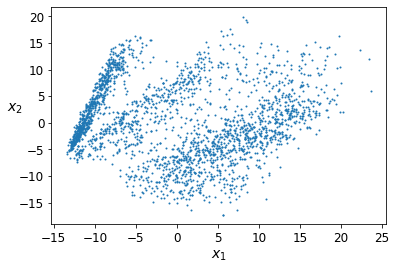

In [101]:
plot_clusters(X_train)

We can easly distinguish 3 clusters, but we know that we have 10 classes. So we need to focus on 10 cluster.

<h3><font color='darkblue'>Fit and Predict - Clusters </font></h3>

Let's train a K-Means clusterer on this dataset.

In [102]:
from sklearn.cluster import KMeans

In [103]:
#we know that we have 10 data type
nbK = 10
#define a random state for t
kmeans = KMeans(n_clusters=nbK, random_state=5)
kmeans.fit(X_train)

KMeans(n_clusters=10, random_state=5)

In [104]:
y_pred = kmeans.fit_predict(X_train)
y_pred


array([2, 5, 7, ..., 9, 3, 9])

Each instance was assigned to one of the five clusters. In the context of clustering, an instance’s label is the **index of the cluster** that this instance gets assigned to by the algorithm: this is not to be confused with the **class labels** in classification

In [105]:
y_pred is kmeans.labels_

True

And the following 10 _centroids_ (i.e., cluster centers) were estimated:

In [106]:
kmeans.cluster_centers_

array([[ 13.59500652,  10.05467277],
       [-10.08009542,   3.28684805],
       [ -0.96388399,  -8.81532515],
       [  2.47824197,   8.57220768],
       [  6.51146371,  -3.21866698],
       [  5.25722784, -10.84528263],
       [ -7.4605621 ,  10.48616279],
       [ -3.76117799,   1.41176864],
       [ 13.27144535,   1.35366513],
       [-11.1319063 ,  -2.79964147]])

In [107]:
y_pred

array([2, 5, 7, ..., 9, 3, 9])

In [108]:
kmeans.predict(X_test)

array([9, 6, 5, ..., 5, 5, 9])

This function try to get the previous labels of the cluster.
It plot histogram with the repartition between all the clusters

In [109]:
def _Get_back_labels(clustered_labels,true_labels,y_to_train):
    
    reference_labels = {}
    numberCounted = {}
    newListes = {}
    appendNumb = np.array([])
    for i in range (len(y_to_train)):
        if y_to_train[i] not in appendNumb:
            # add the number to the array
            appendNumb = np.append(appendNumb, y_to_train[i])            
            smallDict = np.zeros(len(true_labels))
            for j in range(len(y_to_train)):
                if y_to_train[j] == y_to_train[i]:
                         smallDict[clustered_labels[j]] += 1
            numberCounted["{}".format(y_to_train[i])] = smallDict
    for k in range(len(true_labels)):
        reference_labels["{}".format(k)] = np.argmax(numberCounted["{}".format(k)])
    
    for i in range(len(true_labels)):
        arrayCLuster = []
        for j in range(len(true_labels)):
            arrayCLuster.append(numberCounted["{}".format(j)][i])
        newListes["{}_clust".format(i)] = arrayCLuster      
        
    fig, axs = plt.subplots(2, 5, figsize=(20, 5))
    otherAx= [0,1,2,3,4,5,6,7,8,9]
    axs[0,0].hist(otherAx, weights=numberCounted['0'],label='Class 0')
    axs[0,1].hist(otherAx, weights=numberCounted['1'],label='Class 1')
    axs[0,2].hist(otherAx, weights=numberCounted['2'],label='Class 2')
    axs[0,3].hist(otherAx, weights=numberCounted['3'],label='Class 3')
    axs[0,4].hist(otherAx, weights=numberCounted['4'],label='Class 4')
    axs[1,0].hist(otherAx, weights=numberCounted['5'],label='Class 5')
    axs[1,1].hist(otherAx, weights=numberCounted['6'],label='Class 6')
    axs[1,2].hist(otherAx, weights=numberCounted['7'],label='Class 7')
    axs[1,3].hist(otherAx, weights=numberCounted['8'],label='Class 8')
    axs[1,4].hist(otherAx, weights=numberCounted['9'],label='Class 9')
    plt.show()
    
    return numberCounted, reference_labels

## Decision Boundaries

Let's plot the model's decision boundaries. This gives us a Voronoi diagram:

In [110]:
<font color="darkblue">We build a 4 layers Convultionnal Neural Network</font>def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [111]:
kmeans = KMeans(n_clusters=10, init="k-means++", n_init=1,
                              algorithm="full", random_state=11)
kmeans.fit(X_train)

C:\Users\Augustin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


KMeans(algorithm='full', n_clusters=10, n_init=1, random_state=11)

As you can see, we end up with the initial model, which is certainly the optimal K-Means solution (at least in terms of inertia, and assuming $k=5$).

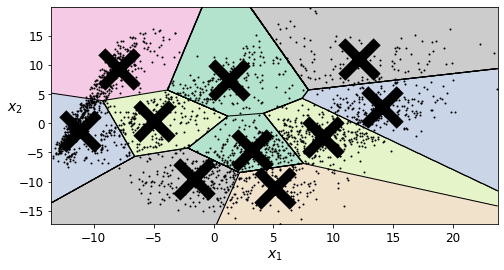

In [112]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_train)
plt.show()

We can see that some cluster may be wrong assigned, we can use the function previously coded to see more informations about these clusters

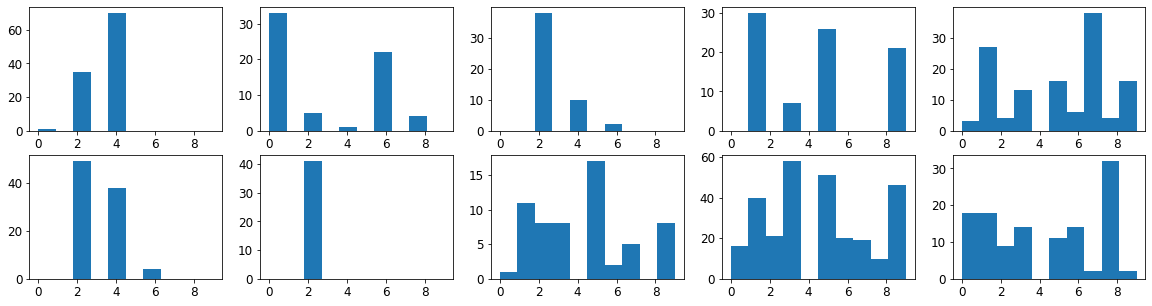

Estimated Labels : {'0': 4, '1': 0, '2': 2, '3': 1, '4': 7, '5': 2, '6': 2, '7': 5, '8': 3, '9': 8}


In [113]:
# dataArticles
y_predicted = kmeans.predict(X_test)

reference_labels, numberCounted = _Get_back_labels(y_predicted,dataArticles,np.array(y_test))
print('Estimated Labels :', numberCounted)

We can conclude that some clusters are identicals or very close to each other.

 Some of the cluster have the categories classes in common that normaly are different

<h3><font color='darkblue'> Cluster's Metrics </font></h3>

In [114]:
from sklearn import metrics
def Cluster_Score(y_trained, labels):
    print("Homogeneity: %f" % metrics.homogeneity_score(y_trained, labels))
    print("Completeness: %f" % metrics.completeness_score(y_trained, labels))
    print("V-measure: %f" % metrics.v_measure_score(y_trained, labels))

In [115]:
Cluster_Score(y_test, y_predicted)

Homogeneity: 0.340145
Completeness: 0.327358
V-measure: 0.333629


These first metrics are very bad score for the moment.

We have now to try estimate the cluster and tune the parameters to see if things are going better

<h2><font color='darkred'> Hard and Soft Clustering </font></h2>

As we don't have the target because this learning is unsupervised we can try to use the inertia function to compare the clusters with their centroid

In [116]:
kmeans.inertia_

25474.85530875932

In [117]:
X_dist = kmeans.transform(X_train)
np.sum(X_dist[np.arange(len(X_dist)), y_pred]**2)

468278.2764092454

In [118]:
kmeans.score(X_train)

-25474.85530875932

In [119]:
print('Estimated Labels :')
numberCounted

Estimated Labels :


{'0': 4,
 '1': 0,
 '2': 2,
 '3': 1,
 '4': 7,
 '5': 2,
 '6': 2,
 '7': 5,
 '8': 3,
 '9': 8}

We can also see with our previous function that some classes aren't associated with one cluster.


In [120]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

C:\Users\Augustin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\Augustin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


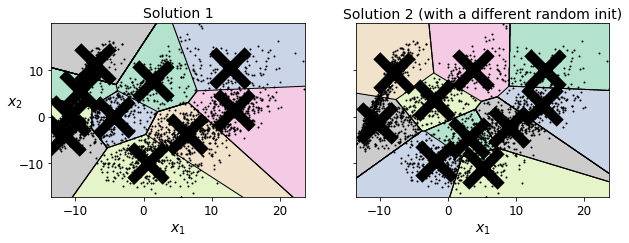

In [121]:
kmeans_rnd_init1 = KMeans(n_clusters=10, init="random", n_init=1,
                         algorithm="full", random_state=44)
kmeans_rnd_init2 = KMeans(n_clusters=10, init="random", n_init=1,
                         algorithm="full", random_state=64)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X_train,
                          "Solution 1", "Solution 2 (with a different random init)")
plt.show()

* Random Init : 44

In [122]:
y_predicted = kmeans_rnd_init1.predict(X_test)
Cluster_Score(y_test, y_predicted)

Homogeneity: 0.349171
Completeness: 0.336347
V-measure: 0.342639


* Random Init : 64

In [123]:
y_predicted = kmeans_rnd_init2.predict(X_test)
Cluster_Score(y_test, y_predicted)

Homogeneity: 0.332113
Completeness: 0.324614
V-measure: 0.328321


By changing the initialisation of the cluster we didn't change the score of the Kmeans but we can see in the graph that the clusters are drastically differents.

<h3><font color='darkred'> Multiple Initializations </font></h3>

In [124]:
kmeans_rnd_10_inits = KMeans(n_clusters=10, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X_train)

C:\Users\Augustin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=10, random_state=11)

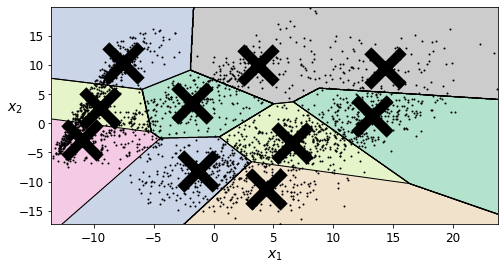

In [125]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X_train)
plt.show()

In [126]:
y_predicted = kmeans_rnd_10_inits.predict(X_test)
Cluster_Score(y_test, y_predicted)

Homogeneity: 0.333456
Completeness: 0.320724
V-measure: 0.326966


As you can see, we end up with the initial model, which is certainly the optimal K-Means solution. 

The metrics are basically the same but the graph looks better than the first one.

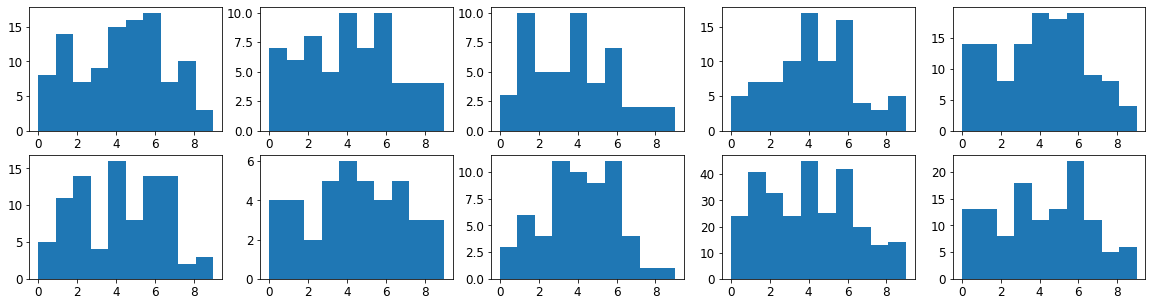

In [127]:
reference_labels, numberCounted = _Get_back_labels(kmeans_rnd_10_inits.labels_,dataArticles,np.array(y_test))

After the graph visualisation, the results looks worst than the first one

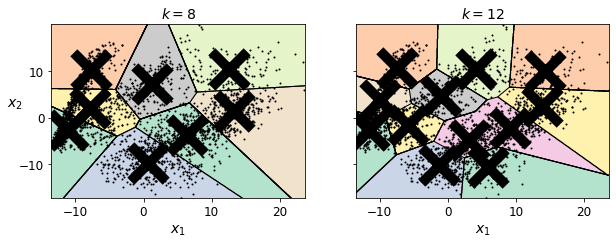

In [128]:
kmeans_k8 = KMeans(n_clusters=8, random_state=42)
kmeans_k12 = KMeans(n_clusters=12, random_state=42)

plot_clusterer_comparison(kmeans_k8, kmeans_k12, X_train, "$k=8$", "$k=12$")
plt.show()

In [129]:
kmeans_k8.score(X_train)

-31341.839160568612

In [130]:
kmeans_k12.score(X_train)

-19624.593051741704

In our case, this example is just to see how the score can evolve by changing the number of cluster 
In fact, we don't need to determine the number of cluster because we know that we have 10 Classes

<h3><font color='darkred'> Gaussian Mixture </font></h3>

Lets' compare the previous results with another type of clustering, the Guassian mixture

In [131]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=10, random_state=0).fit(X_train)
gm.means_

array([[  0.44228539,   6.72564844],
       [ -1.0185629 ,  -9.25113334],
       [  8.85100323,  -2.1918284 ],
       [ -7.16828682,  -1.14274945],
       [ -8.12561131,   8.92592603],
       [ 11.53091091,   9.58631101],
       [-11.53907151,  -0.65066126],
       [ 13.77296168,   2.31223471],
       [  3.61815909,  -4.8847091 ],
       [  5.20546746, -10.9395525 ]])

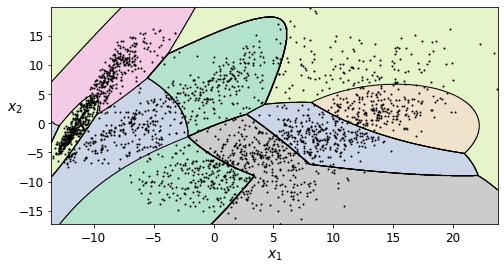

In [132]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(gm, X_train, show_centroids = False)
plt.show()

In [133]:
y_gm_pred = gm.predict(X_test)
Cluster_Score(y_test, y_gm_pred)

Homogeneity: 0.377423
Completeness: 0.356987
V-measure: 0.366921


* Naives Bayes Score

In [134]:
print('Naives Bayes :',round(naives_score*100,2),'%')

Naives Bayes : 41.58 %


<font color='darkblue'>Clustering algorythm is not very accurate with my dataset.
However between these clustering algorithm, Hard clustering,( the Gaussiam mixture) is more accurate than the Kmeans.</font>

<font color='darkblue'>Compared to the naives bayes, Gaussian mixture are really close in term of score but still not a good enought result for the classification.</font>

# PART III - Supervised Learning

<font color='green'>-1- 
    Use Decision trees (the J48 algorithm) on a training set, measure the accuracy. Then measure
the accuracy on the training set using 10-fold cross-validation. Record all your findings and explain
them. Use the major metrics: accuracy, TP rate, FP rate, precision, recall, F measure, the ROC area if
needed.</font>

<h3><font color='darkred'>Training and visualizing - Decision Trees </font></h3>

In [135]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [136]:
#get the full dataframe
X_train, X_test, Y_train, Y_test = pca_reduction_test_train(pca_component=500,test_size_val=0.1)

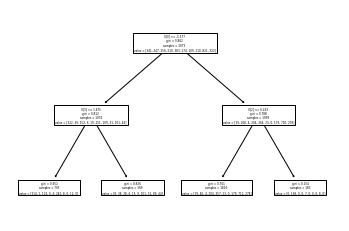

In [137]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, Y_train) 
plot_tree(tree_clf);

<h3><font color='darkred'>Scoring </font></h3>

In [138]:
cross_val_score(tree_clf, X_train, Y_train, cv=10)

array([0.35714286, 0.35714286, 0.42532468, 0.40716612, 0.40390879,
       0.42345277, 0.3713355 , 0.39087948, 0.41693811, 0.43648208])

In [139]:
y_score = tree_clf.score(X_train,Y_train)

print('Accuracy: ', y_score)

Accuracy:  0.4214123006833713


 <font color='green'>-2- Repeat the experiment, this time using training and testing data sets instead of the cross
validation. That is, build the J48 classifier using the training data set, and test the classifier using the test
data set. Note the accuracy. Answer the question: Does the decision tree generalize well to new data?
How do you tell?</font>

In [140]:
y_score = tree_clf.score(X_test,Y_test)

print('Accuracy: ', y_score)

Accuracy:  0.38596491228070173


The accuracy has reduced after testing the dataset with trainning dataset. The decision tree loose efficient on fitting to new data

<font color='green'>-3- Experiment with various decision tree parameters that control the size of the tree. For example:
depth of the tree, confidence threshold for pruning, splitting criteria and the minimal number of instances
permissible per leaf. Make conclusions about their influence on the classifier's performance.</font>

*   min_samples_split (the minimum number of sam‐ ples a node must have before it can be split)
*   min_samples_leaf (the minimum num‐ ber of samples a leaf node must have) 
*   min_weight_fraction_leaf (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances)
* max_leaf_nodes (maximum number of leaf nodes)
* max_features (maximum number of features that are evaluated for splitting at each node). 

After some tries with different parameters, I choose 3 : <em>" min_samples_leaf , max_leaf_nodes , max_depth "</em> that impacted the most the the accuracy output

In [141]:
Xm, ym = X_train, Y_train

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf3 = DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)
deep_tree_clf4 = DecisionTreeClassifier(max_depth=10,min_samples_leaf=10, random_state=42)


deep_tree_clf1.fit(X_train, Y_train)
deep_tree_clf2.fit(X_train, Y_train)
deep_tree_clf3.fit(X_train, Y_train)
deep_tree_clf4.fit(X_train, Y_train)

y_score_1 = deep_tree_clf1.score(X_test,Y_test)
y_score_2 = deep_tree_clf2.score(X_test,Y_test)
y_score_3 = deep_tree_clf3.score(X_test,Y_test)
y_score_4 = deep_tree_clf4.score(X_test,Y_test)

print('Accuracy with tree freedoms              : ', round(y_score_1*100,2),'%')
print('Accuracy min 4 sample leaf               : ', round(y_score_2*100,2),'%')
print('Accuracy max 5 leaf node                 : ', round(y_score_3*100,2),'%')
print('Accuracy min 10 sample leaf, max depth 10: ', round(y_score_4*100,2),'%')

Accuracy with tree freedoms              :  66.37 %
Accuracy min 4 sample leaf               :  65.2 %
Accuracy max 5 leaf node                 :  42.69 %
Accuracy min 10 sample leaf, max depth 10:  66.96 %


When we leave the parameters to the tree's freedom, we have an accuracy bigger than with a fixed depth test.

We also can see than as we increase the leaf's sample, the accuracy become bigger and bigger probably mean the model start to be overfited.

<font color='green'>-4-Make new training and testing sets, by moving 30% of the instances from the original training
set into the testing set. Note the accuracies on the training and the testing sets </font>

<h3><font color='darkred'>Test Set 30/60 % size </font></h3>

In [142]:
X_train, X_test, Y_train, Y_test  = pca_reduction_test_train(pca_component=500,test_size_val=0.3)

In [143]:
def test_train_tree_Compare(X_train, X_test, Y_train, Y_test):
    deep_tree_clf = DecisionTreeClassifier(max_depth=8,min_samples_leaf=4, random_state=42)
    deep_tree_clf.fit(X_train, Y_train)

    y_score_test = deep_tree_clf.score(X_test,Y_test)
    y_score_train = deep_tree_clf.score(X_train,Y_train)

    print('Accuracy with train set: ', round(y_score_train*100,2),'%')
    print('Accuracy with test set: ', round(y_score_test*100,2),'%')

In [144]:
test_train_tree_Compare(X_train, X_test, Y_train, Y_test)

Accuracy with train set:  85.23 %
Accuracy with test set:  65.95 %


<font color='green'>-5- Make new training and testing sets, by moving 60% of the instances from the original training
set into the testing set. Note the accuracies on the training and the testing sets</font>

In [145]:
X_train, X_test, Y_train, Y_test  = pca_reduction_test_train(pca_component=500,test_size_val=0.6)

In [146]:
test_train_tree_Compare(X_train, X_test, Y_train, Y_test)

Accuracy with train set:  80.38 %
Accuracy with test set:  62.62 %


As we increase the test set size, we have a significant decreasing of the accuracy on the test set. However, the accuracy increasing on the train set.

<font color='green'>-6- Analyse your results from the point of view of the problem of classifier over-fitting. Do you
notice the effects of over-fitting? How? Note your conclusions in the Jupyter notebook.</font>

<h4> As the model is very efficient with the trained dataset <u>20%</u> more efficient, we can clearly seen overfitting in our model.</h4>
</n>
<h4>The only soluion to get a ratio more similar between the 2 datasets is to reduce the tree depth </h4>

<font color='green'>-7- For higher marks, try some other decision tree algorithms (e.g. random forests). Repeat all of the
above experiments and make conclusions.</font>

## Random Forest Classifier

In [147]:
#We are now going to compare the J48 decision tree classifier with the random forest classifier

<h3><font color='darkred'> Overview - Fit and Predict </font></h3>

In [148]:
X_train, X_test, y_train, y_test = pca_reduction_test_train(pca_component=2,test_size_val=0.1)

Rnd_Forest_clf = RandomForestClassifier(max_depth=2, random_state=0)
Rnd_Forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [149]:
Rnd_Forest_clf.predict(X_test)

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 9, 8, 0, 8, 0, 8, 5, 8, 8, 5,
       8, 5, 8, 8, 0, 0, 5, 0, 8, 0, 5, 8, 8, 8, 1, 8, 8, 8, 0, 8, 8, 8,
       0, 8, 8, 8, 9, 8, 0, 9, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 9, 1, 8, 9,
       9, 8, 0, 0, 8, 8, 5, 8, 9, 5, 8, 5, 8, 8, 1, 8, 8, 9, 8, 8, 0, 8,
       5, 8, 0, 8, 0, 9, 0, 8, 0, 5, 0, 8, 5, 5, 8, 8, 9, 8, 5, 0, 8, 8,
       8, 9, 9, 8, 5, 8, 8, 8, 8, 0, 8, 8, 0, 8, 8, 8, 8, 0, 5, 8, 5, 0,
       8, 9, 8, 5, 9, 8, 8, 5, 5, 8, 8, 8, 8, 8, 0, 0, 8, 8, 0, 5, 8, 5,
       0, 8, 8, 8, 8, 8, 8, 9, 8, 5, 8, 8, 5, 9, 8, 8, 0, 8, 8, 5, 9, 8,
       8, 0, 8, 9, 8, 8, 8, 8, 0, 0, 5, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 5,
       9, 9, 8, 8, 8, 0, 8, 8, 0, 8, 0, 5, 8, 0, 8, 8, 5, 0, 1, 8, 8, 5,
       5, 8, 8, 8, 5, 8, 5, 8, 5, 8, 5, 0, 8, 8, 5, 5, 8, 8, 8, 8, 8, 5,
       8, 8, 5, 8, 8, 0, 1, 5, 8, 8, 8, 5, 0, 8, 5, 8, 5, 0, 8, 8, 5, 5,
       0, 5, 8, 5, 5, 8, 5, 8, 0, 8, 8, 8, 8, 8, 8, 8, 5, 0, 5, 8, 9, 8,
       8, 0, 8, 8, 8, 8, 9, 5, 9, 0, 8, 0, 5, 8, 0,

In [150]:
y_rnd_train_score = Rnd_Forest_clf.score(X_train, y_train)
y_rnd_test_score = Rnd_Forest_clf.score(X_test, y_test)

print('Accuracy with train set: ', round(y_rnd_train_score*100,2),'%')
print('Accuracy with test set: ', round(y_rnd_test_score*100,2),'%')

Accuracy with train set:  41.59 %
Accuracy with test set:  33.33 %


In [151]:
cross_val_score(Rnd_Forest_clf, X_train, y_train, cv=10) 

array([0.40909091, 0.3961039 , 0.40584416, 0.3713355 , 0.41042345,
       0.39739414, 0.43973941, 0.39739414, 0.41368078, 0.41693811])

With the decision tree we had around 40-44 of precision so result are basically the same for the first try

<h3><font color='darkred'> Tunning the parameters </font></h3>

In [152]:
deep_rndFor_clf1 = RandomForestClassifier(random_state=42)
deep_rndFor_clf2 = RandomForestClassifier(min_samples_leaf=4, random_state=42)
deep_rndFor_clf3 = RandomForestClassifier(max_leaf_nodes=5, random_state=42)
deep_rndFor_clf4 = RandomForestClassifier(max_depth=10,min_samples_leaf=10, random_state=42)


deep_tree_clf1.fit(X_train, y_train)
deep_tree_clf2.fit(X_train, y_train)
deep_tree_clf3.fit(X_train, y_train)
deep_tree_clf4.fit(X_train, y_train)

y_score_1 = deep_tree_clf1.score(X_test,y_test)
y_score_2 = deep_tree_clf2.score(X_test,y_test)
y_score_3 = deep_tree_clf3.score(X_test,y_test)
y_score_4 = deep_tree_clf4.score(X_test,y_test)

print('Accuracy with forest freedoms              : ', round(y_score_1*100,2),'%')
print('Accuracy min 4 samples leaf                : ', round(y_score_2*100,2),'%')
print('Accuracy max 5 leafs node                  : ', round(y_score_3*100,2),'%')
print('Accuracy min 10 samples leafs, max depth 10: ', round(y_score_4*100,2),'%')

Accuracy with forest freedoms              :  39.18 %
Accuracy min 4 samples leaf                :  45.32 %
Accuracy max 5 leafs node                  :  33.92 %
Accuracy min 10 samples leafs, max depth 10:  44.74 %


In [153]:
#Result for decision trees :

 With the exact same parameters than the decision tree we have probably less overfitting, the model change in a range of 5% and not 20%

<h3><font color='darkblue'> DataSet Size Tunning </font></h3>

In [154]:
def test_train_forest_Compare(X_train, X_test, Y_train, Y_test):
    deep_tree_clf = RandomForestClassifier(max_depth=8,min_samples_leaf=4, random_state=42)
    deep_tree_clf.fit(X_train, Y_train)

    y_score_test = deep_tree_clf.score(X_test,Y_test)
    y_score_train = deep_tree_clf.score(X_train,Y_train)

    print('Accuracy with train set: ', round(y_score_train*100,2),'%')
    print('Accuracy with test set: ', round(y_score_test*100,2),'%')

<u>30% test Size</u>

In [155]:
X_train, X_test, Y_train, Y_test  = pca_reduction_test_train(pca_component=500,test_size_val=0.3)
test_train_forest_Compare(X_train, X_test, Y_train, Y_test)

Accuracy with train set:  87.53 %
Accuracy with test set:  66.24 %


<u>60% Test Size</u>

In [156]:
X_train, X_test, Y_train, Y_test  = pca_reduction_test_train(pca_component=500,test_size_val=0.6)
test_train_forest_Compare(X_train, X_test, Y_train, Y_test)

Accuracy with train set:  92.61 %
Accuracy with test set:  63.74 %


Like in the J48 decision tree classifier, we can notice that when we increase the test set size, we have a significant decreasing of the accuracy on the test set. However, the accuracy increasing on the train set reachin close to 100%.

<font color='darkblue'>
As a conclusion, I would say that after analysing both classifiers, decision tree and Random forest, the Random Forest are more efficient than the decision tree.
</font>

<font color='darkblue'>It appear that the decision tree classifier can overfit more easier than the random forest classifier.
With both of these two classifiers, a good tuning is essential to avoid over-fitting the model. To keep a good score it is important to try serveral parameters to not use a model only working on the training dataset. </font> 

<font color='darkblue'> Also, we can see that compared to all the other classifiers, the decision tree are for the moment the more efficient with our dataset</font>  

# PART IV - Neural Networks and Convolutional Neural Networks

 <h3><font color='darkred'> Overview - Linear classifier </font></h3>

<font color='green'>-1- Run a Linear classifier on the training data set, with 10-fold cross validation and without, mark
the accuracies. Note also its accuracy on the test set. How well does the linear classifier generalize to
new data? What hypothesis can you make about this data set being linearly separable or not?</font>

In [157]:
X_train, X_test, y_train, y_test = pca_reduction_test_train(pca_component=500,test_size_val=0.2)

<font color="darkblue">We get theta the parameters the regression line</font>

In [158]:
X_b = np.c_[np.ones((len(X_train), 1)), X_train]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

In [159]:
theta_best

array([ 5.10813268e+00,  1.42007471e-01, -1.22529169e-01, -2.66162535e-01,
        1.35447135e-01,  8.30039491e-02,  2.49253232e-01, -4.39859220e-01,
       -1.05282799e-01,  4.31536871e-02, -2.43143303e-01, -6.37001225e-02,
        6.64764213e-02,  2.49051080e-02, -7.58510330e-02,  1.93489480e-01,
       -3.51468517e-02, -1.06805362e-01, -1.88561985e-01, -2.71988984e-02,
       -5.80573480e-02, -1.31840488e-02,  3.51963468e-02,  8.92326067e-02,
        1.76288771e-01,  1.32690038e-01,  4.40591025e-02,  1.70398948e-01,
        1.36629966e-01,  5.03654020e-02,  3.38085861e-01,  1.01278267e-03,
       -1.21994743e-01, -3.17168282e-02,  4.36527578e-02,  4.25517672e-01,
       -2.59927410e-01,  1.09881214e-02,  6.00550906e-03, -1.28811863e-01,
        1.21778112e-01,  1.10337710e-01, -2.23513866e-01, -3.60560771e-01,
        7.90588449e-02, -2.08674991e-01,  7.13535527e-02, -3.16667314e-01,
        3.42839165e-01, -1.47080980e-01,  2.68660061e-01, -1.71819218e-01,
       -1.08608622e-03, -

In [160]:
# X_new = np.array([[0], [2]])
X_new = np.c_[np.ones((len(X_train), 1)), X_train]  # add x0 = 1 to each instance
y_predict = X_new.dot(theta_best)
y_predict

array([1.71174217, 0.81558102, 1.53560637, ..., 5.51798127, 0.97153999,
       7.35113582])

In [161]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_new, y_train)
lin_reg.intercept_, lin_reg.coef_

(1295998466035.5642,
 array([-1.29599847e+12,  1.42007651e-01, -1.22529028e-01, -2.66157127e-01,
         1.35453401e-01,  8.29999337e-02,  2.49250617e-01, -4.39853765e-01,
        -1.05279845e-01,  4.31697411e-02, -2.43133219e-01, -6.37035052e-02,
         6.64483598e-02,  2.48937964e-02, -7.58617475e-02,  1.93490733e-01,
        -3.51477508e-02, -1.06819625e-01, -1.88570596e-01, -2.72132643e-02,
        -5.80463810e-02, -1.31652419e-02,  3.51823938e-02,  8.92145699e-02,
         1.76303663e-01,  1.32705493e-01,  4.40522369e-02,  1.70379523e-01,
         1.36639064e-01,  5.03685975e-02,  3.38080491e-01,  9.92399360e-04,
        -1.21988901e-01, -3.16811849e-02,  4.36745915e-02,  4.25506077e-01,
        -2.59901402e-01,  1.09718819e-02,  6.01702944e-03, -1.28784368e-01,
         1.21779108e-01,  1.10300100e-01, -2.23533679e-01, -3.60543954e-01,
         7.90876026e-02, -2.08657151e-01,  7.13341711e-02, -3.16677674e-01,
         3.42806055e-01, -1.47097317e-01,  2.68641409e-01, -1.71841

In [162]:
lin_reg.predict(X_new)

array([1.72412109, 0.81542969, 1.53540039, ..., 5.51928711, 0.97241211,
       7.35205078])

In [163]:
scores = cross_val_score(lin_reg, X_new, y_train, scoring='r2', cv=10)
scores

array([0.59135748, 0.61950079, 0.58297218, 0.66074623, 0.62830099,
       0.64694294, 0.63653607, 0.57556392, 0.61224323, 0.55550453])

<font color="darkblue">The accuracy for 10 the cross fold val check is around 60% </font>

In [164]:
print('Linear Regression Accuracy score : ',lin_reg.score(X_new,y_train))

Linear Regression Accuracy score :  0.7579345152111571


<font color="darkblue">The accuracy for the linear regression is 76% </font>

<font color="darkblue">In the end, these scores are really good compared to all the previous algorythm we tried previously.</font>

<font color="darkblue">Let's move to the neural network to compare the previous accuracy</font>

 <h3><font color='darkred'> Multilayer Perceptron </font></h3>

<font color='green'>-2- Run the Multilayer Perceptron, experiment with various Neural Network parameters: modify
the activation functions, experiment with the number and size of its layers, vary the learning rate, epochs
and momentum, and validation threshold. Analyse relative performance of the resulting Neural
Networks and changing parameters, using the training and the test data.</font>

<font color="darkblue">We re-imported the whole data set to manipulate the unprocessed data</font>

In [165]:
import tensorflow as tf
from tensorflow import keras

In [166]:
from sklearn.preprocessing import OrdinalEncoder
# sklearn OrdinalEncoder class is used to convert categorical values to numbers
ordinal_encoder = OrdinalEncoder() 
ex_fashion_cat_encoded = ordinal_encoder.fit_transform(extended_Fashion[['articleType']])
extended_Fashion['articleType'] = ex_fashion_cat_encoded
ex_fashion_cat_encoded[:10] # Lists the numerical values that correspond to the categorical attribute


array([[4.],
       [9.],
       [8.],
       [8.],
       [4.],
       [4.],
       [9.],
       [0.],
       [1.],
       [4.]])

In [167]:
import tensorflow as tf
from tensorflow import keras

In [168]:
images_arr = extended_Fashion['Gray_Matrice']

In [169]:
target_data = extended_Fashion['articleType']
X_train, X_test, y_train, y_test = train_test_split(images_arr,target_data,test_size=0.2) 

In [170]:
X_train = X_train / 255.
X_test = X_test / 255.

In [171]:
imgShape = X_train[0].shape
imgShape

(86, 65)

In [172]:
X_train[0].dtype

dtype('float64')

In [173]:
X_new_train, X_new_test = X_train.tolist(), X_test.tolist()
X_new_train, X_new_test = np.array(X_new_train, dtype=np.float), np.array(X_new_test, dtype=np.float)

C:\Users\Augustin\AppData\Local\Temp/ipykernel_9576/2653697359.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_new_train, X_new_test = np.array(X_new_train, dtype=np.float), np.array(X_new_test, dtype=np.float)


<font color="darkblue">These 2 functions have a role of reducing the numbers of classes in a dataset.
This allow to compare the different result betwwen different sizes dataset.</font>

In [174]:
keep_class = [0,1,2,3,4,5,6,7,8,9]
X_rd_train, y_rd_train = [],[]
for idx, values in enumerate(y_train):
    if values in keep_class:
        X_rd_train.append(X_new_train[idx])
        y_rd_train.append(values)
X_rd_train, y_rd_train = np.array(X_rd_train), np.array(y_rd_train)   

In [175]:
X_rd_test, y_rd_test = [],[]
for idx, values in enumerate(y_test):
    if values in keep_class:
        X_rd_test.append(X_new_test[idx])
        y_rd_test.append(values)
X_rd_test, y_rd_test = np.array(X_rd_test), np.array(y_rd_test)        

In [176]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

<font color="darkblue">Here is a simple neural network model with 3 layers </font>

In [177]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=imgShape),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [178]:
model.layers

In [179]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 5590)              0         
                                                                 
 dense (Dense)               (None, 300)               1677300   
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 1,739,510
Trainable params: 1,739,510
Non-trainable params: 0
_________________________________________________________________


In [180]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", #"sgd" simply means that we will train the model using simple Stochastic Gradient Descent
              metrics=["accuracy"])

<font color="darkblue">After many tries, I wasn't able to run tensorflow from the gpu</font>

<font color="darkblue">However, we will see later that the network didn't take that much time to run</font>

In [181]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [182]:
history = model.fit(X_rd_train, y_rd_train, epochs=20,
                    validation_data=(X_rd_test, y_rd_test))

Epoch 1/20
573/573 [==============================] - 2s 4ms/step - loss: 1.1631 - accuracy: 0.5456 - val_loss: 0.8745 - val_accuracy: 0.6514
Epoch 2/20
573/573 [==============================] - 2s 3ms/step - loss: 0.7503 - accuracy: 0.6928 - val_loss: 0.6749 - val_accuracy: 0.7055
Epoch 3/20
573/573 [==============================] - 2s 3ms/step - loss: 0.6557 - accuracy: 0.7342 - val_loss: 0.6509 - val_accuracy: 0.7263
Epoch 4/20
573/573 [==============================] - 2s 3ms/step - loss: 0.5969 - accuracy: 0.7577 - val_loss: 0.5850 - val_accuracy: 0.7603
Epoch 5/20
573/573 [==============================] - 2s 3ms/step - loss: 0.5723 - accuracy: 0.7683 - val_loss: 0.6619 - val_accuracy: 0.7308
Epoch 6/20
573/573 [==============================] - 2s 3ms/step - loss: 0.5394 - accuracy: 0.7807 - val_loss: 0.5188 - val_accuracy: 0.7854
Epoch 7/20
573/573 [==============================] - 2s 3ms/step - loss: 0.5178 - accuracy: 0.7874 - val_loss: 0.5425 - val_accuracy: 0.7808
Epoch 

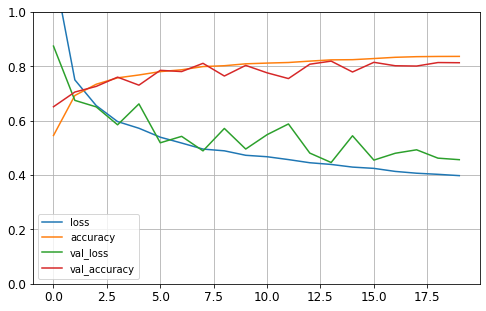

In [183]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [184]:
model.evaluate(X_rd_test, y_rd_test) # now finally time to evaluate your model on the testing set

144/144 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.8134


[0.45664680004119873, 0.8133594989776611]

<font color="darkblue">The neural network ended up with 83% of accuracy and a loss avlue of 43%</font>

<font color="darkblue">This score is a good score compared to all the previous one we add but the loss value is not as good as we want</font>

In [185]:
X_new = X_new_test[:3] # make predictions on  first 3 instances of the test set 
y_proba = model.predict(X_new)
y_proba.round(2) # For each instance the model estimates one probability per class, from class 0 to class 9

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.93, 0.  , 0.  , 0.  , 0.07, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.37, 0.  , 0.  , 0.01, 0.62, 0.  ]],
      dtype=float32)

In [186]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([8, 4, 8], dtype=int64)

In [187]:
y_new = y_rd_test[:3]
y_new

array([8., 4., 8.])

<font color="darkblue">In the end theses results are far more better than the previous one in all the previous classifier.</font>

<font color="darkblue">We need now to test another possibility to check if are dataset is capable of better results</font>

 <h3><font color='darkred'> Run perceptron on reduced classes </font></h3>

<font color="darkblue">We now reduce the dataset to 5 classes to see how the results are going on</font>

In [188]:
keep_class = [0,1,2,3,4]
X_rd_train, y_rd_train = [],[]
for idx, values in enumerate(y_train):
    if values in keep_class:
        X_rd_train.append(X_new_train[idx])
        y_rd_train.append(values)
X_rd_train, y_rd_train = np.array(X_rd_train), np.array(y_rd_train)   

In [189]:
X_rd_test, y_rd_test = [],[]
for idx, values in enumerate(y_test):
    if values in keep_class:
        X_rd_test.append(X_new_test[idx])
        y_rd_test.append(values)
X_rd_test, y_rd_test = np.array(X_rd_test), np.array(y_rd_test)        

In [190]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [191]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=imgShape),
    keras.layers.Dense(800, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [192]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", #"sgd" simply means that we will train the model using simple Stochastic Gradient Descent
              metrics=["accuracy"])

In [193]:
history = model.fit(X_rd_train, y_rd_train, epochs=20,
                    validation_data=(X_rd_test, y_rd_test))

Epoch 1/20
247/247 [==============================] - 2s 9ms/step - loss: 0.6875 - accuracy: 0.7189 - val_loss: 0.7057 - val_accuracy: 0.7959
Epoch 2/20
247/247 [==============================] - 2s 9ms/step - loss: 0.3242 - accuracy: 0.8732 - val_loss: 0.7121 - val_accuracy: 0.7456
Epoch 3/20
247/247 [==============================] - 2s 9ms/step - loss: 0.2919 - accuracy: 0.8932 - val_loss: 0.8390 - val_accuracy: 0.6760
Epoch 4/20
247/247 [==============================] - 2s 8ms/step - loss: 0.2287 - accuracy: 0.9149 - val_loss: 0.2199 - val_accuracy: 0.9172
Epoch 5/20
247/247 [==============================] - 2s 9ms/step - loss: 0.2113 - accuracy: 0.9218 - val_loss: 2.8908 - val_accuracy: 0.3900
Epoch 6/20
247/247 [==============================] - 2s 9ms/step - loss: 0.2204 - accuracy: 0.9217 - val_loss: 0.2948 - val_accuracy: 0.8876
Epoch 7/20
247/247 [==============================] - 2s 9ms/step - loss: 0.1778 - accuracy: 0.9364 - val_loss: 0.1582 - val_accuracy: 0.9482
Epoch 

Below we train the model; so we call the  fit() method. We pass it the input features (X_train) and the target classes (y_train), as well as the number of epochs to train 

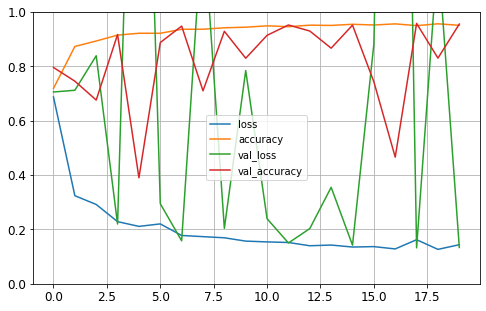

In [194]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [195]:
model.evaluate(X_rd_test, y_rd_test) # now finally time to evaluate your model on the testing set

64/64 [==============================] - 0s 3ms/step - loss: 0.1338 - accuracy: 0.9556


[0.13375064730644226, 0.9556213021278381]

<font color="darkblue">Theses results are 2 times better in term of validity and 5% more in terms of accuracy </font>

In [196]:
y_pred = np.argmax(model.predict(X_rd_test), axis=-1)
y_pred

array([4, 0, 0, ..., 2, 2, 4], dtype=int64)

In [197]:
y_new = y_rd_test[:3]
y_new

array([4., 0., 0.])

 <h3><font color='darkred'> Conclusions  </font></h3>

<font color='green'>-3- Based on all of these experiments, what conclusions can you make about the data set complexity
(linear separability), and the capacity of deep neural networks to generalize to new data? Can you make
any conclusions about the effect of activation functions?</font>

The neural network generalize well to new data. With my 10 classes dataset which contain closer images in termes of shape and color and it's very complex : it end up very well.

 The dataset is very difficult to split in term of separabilty because he had a lot of classes compare to others. The size of images are still big even if it has been reduced 

The deep neural network are very efficient, 2.2 times more efficient than the Random Forest, 3 times more efficient than the Naives Bayes and 10 % more efficient than the linear classifier

 <h3><font color='darkred'> Convolutional Neural networks </font></h3>

<font color='green'>-4- For top marks, repeat these experiments using Convolutional Neural networks. For this types of
networks, you can additionally vary the kinds of layers (convolutional, pooling, fully connected).</font>

<font color="darkblue">Let's try to build a Convultionnal Neural Network</font>

In [198]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [199]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [200]:
images_arr = extended_Fashion['Gray_Matrice']

In [201]:
target_data = extended_Fashion['articleType']
X_train, X_test, y_train, y_test = train_test_split(images_arr,target_data,test_size=0.2) 

train_size = len(y_train_full)
train_size = int(train_size / 2)
X_train_full.dtype

In [202]:
X_train = X_train / 255.
X_test = X_test / 255.

In [203]:
imgShape = X_train[0].shape
imgShape = (86, 65,1)
imgShape

(86, 65, 1)

In [204]:
X_train[0].dtype

dtype('float64')

In [205]:
X_new_train, X_new_test = X_train.tolist(), X_test.tolist()
X_new_train, X_new_test = np.array(X_new_train, dtype=np.float), np.array(X_new_test, dtype=np.float)

C:\Users\Augustin\AppData\Local\Temp/ipykernel_9576/2653697359.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_new_train, X_new_test = np.array(X_new_train, dtype=np.float), np.array(X_new_test, dtype=np.float)


<font color="darkblue">We build a 4 layers Convultionnal Neural Network</font>

In [206]:
modelCNN = models.Sequential()
modelCNN.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=imgShape))
modelCNN.add(layers.MaxPooling2D((2, 2)))
modelCNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelCNN.add(layers.MaxPooling2D((2, 2)))
modelCNN.add(layers.Conv2D(64, (3, 3), activation='softmax'))

In [207]:
modelCNN.add(layers.Flatten())
modelCNN.add(layers.Dense(64, activation='relu'))
modelCNN.add(layers.Dense(10))

In [208]:
modelCNN.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

history = modelCNN.fit(X_new_train, y_train, epochs=10, 
                    validation_data=(X_new_test, y_test))

Epoch 1/10
573/573 [==============================] - 35s 60ms/step - loss: 0.8501 - accuracy: 0.6883 - val_loss: 0.4287 - val_accuracy: 0.8372
Epoch 2/10
573/573 [==============================] - 35s 60ms/step - loss: 0.4087 - accuracy: 0.8410 - val_loss: 0.3875 - val_accuracy: 0.8485
Epoch 3/10
573/573 [==============================] - 34s 60ms/step - loss: 0.3372 - accuracy: 0.8692 - val_loss: 0.3299 - val_accuracy: 0.8734
Epoch 4/10
573/573 [==============================] - 34s 60ms/step - loss: 0.2948 - accuracy: 0.8873 - val_loss: 0.3029 - val_accuracy: 0.8839
Epoch 5/10
573/573 [==============================] - 34s 60ms/step - loss: 0.2655 - accuracy: 0.8988 - val_loss: 0.2824 - val_accuracy: 0.8900
Epoch 6/10
573/573 [==============================] - 34s 60ms/step - loss: 0.2384 - accuracy: 0.9074 - val_loss: 0.2728 - val_accuracy: 0.8917
Epoch 7/10
573/573 [==============================] - 39s 68ms/step - loss: 0.2208 - accuracy: 0.9138 - val_loss: 0.3009 - val_accuracy:

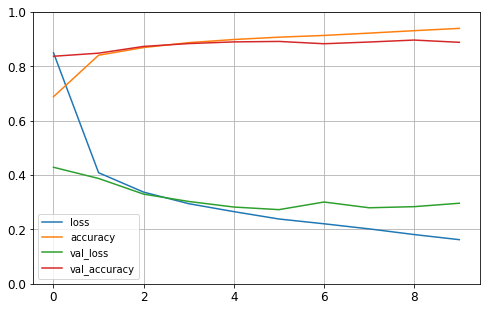

In [209]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [210]:
history.history.keys() # contains the  metrics measured at the end of each epoch on the training set and on the validation set

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [211]:
modelCNN.evaluate(X_new_test, y_test) # now finally time to evaluate your model on the testing set

144/144 [==============================] - 2s 15ms/step - loss: 0.2964 - accuracy: 0.8885


[0.29637274146080017, 0.8884522914886475]

<font color="darkblue">The result are better than the neural network. The accuracy is close to 90% with 29% loss so it's 5% more accurate with 10% more precision</font>

<font color="darkblue">The important thing to keep in mind is that it is a lot more longer in terms of time. Again it require a lot fo data. </font>

<font color="darkblue">For the moment it is the only possible way to have a such high result in terms of efficiency</font>

# PART V - Research Question

<h2><font color='darkred'>- Going deeper into Image Pre-Processing with Binarization-</font></h2>

<font color="darkblue">Image pre-processing is really important to reduce the computationnal cost of an algorythm</font>

<font color="darkblue">As neural network are very expensive to cumpute, we may wonder if there is a possible way to improve less expensive alorythm such as Naives bayes or Random Forest by going deeper into image processing</font>

 <h3><font color='darkred'>Binarization by edge extraction </font></h3>

<font color="darkblue">A lot of process techniques exist. In our pre-processing we only did downscaling and grayscale conversion.</font>

<font color="darkblue">We have seen that especially in Naives baies or classifiers such as Random Forest , the result are not as good as the Convultionnal Neural network, which are really efficient.</font>

<font color="darkblue">The objective is to find a way to improve the result as much as possibe in theses models because they are computaionnaly costless.</font>

<font color="darkblue">To start we are going to binarise the image by using edge extraction</font>

In [212]:
# Example Target Img 
target_nb = 12
img_gray = images_arr[target_nb] 

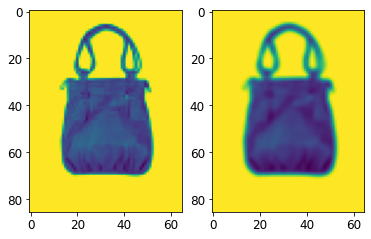

In [213]:
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img_gray)
axs[1].imshow(img_blur)

<font color="darkblue">To start with the edge detection we need to blur the image using gaussian blur</font>

In [214]:
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection

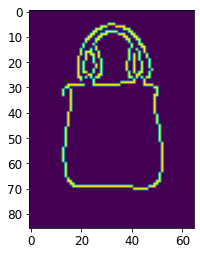

In [215]:
plt.imshow(edges)

<font color="darkblue">After this blur we get the edge by using canny edge detection</font>

<font color="darkblue">The result is really good, we can clearly distinguish the shape of the item</font>

In [216]:
def PlotSquareList(listofImgs, maxIndex=4,figsize=(10, 15)):
    fig, axs = plt.subplots(maxIndex, maxIndex,figsize=figsize)
    imgsNb1,imgsNb2 = 0,0

    for imgs in listofImgs:
        axs[imgsNb1, imgsNb2].imshow(imgs)
        imgsNb2 += 1
        if imgsNb2 > maxIndex - 1:
            imgsNb2 = 0
            imgsNb1 += 1
        if imgsNb1 > maxIndex - 1:
            break

<font color="darkblue">Create the new X list of with binary image edges </font>

* Example with object of class one

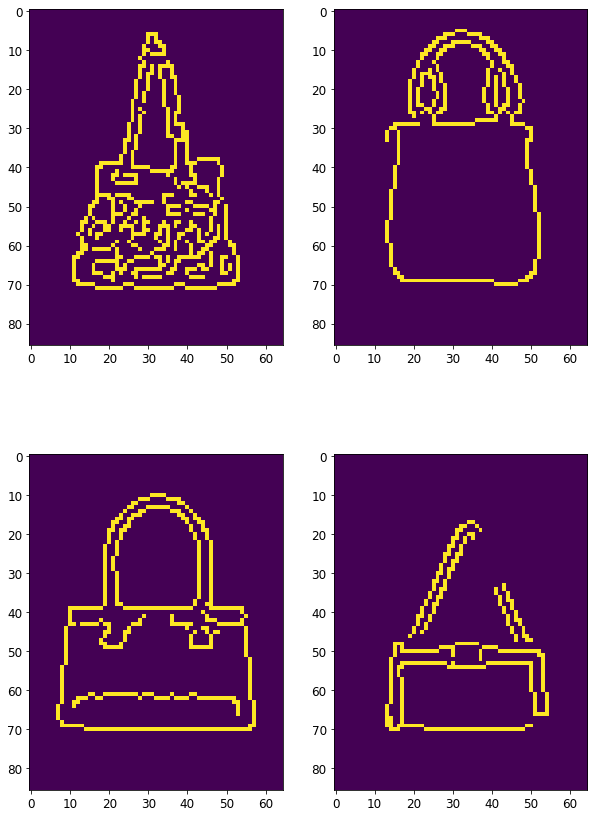

In [217]:
imgs, imgsCt = 0, 0
arrTarg4 = []
while( imgsCt < 16):
    if target_data[imgs] == 1:        
        img_blur = cv2.GaussianBlur(images_arr[imgs], (3,3), 0)         
        edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
        arrTarg4.append(edges)
        imgsCt += 1
    imgs += 1
PlotSquareList(arrTarg4,2)

In [218]:
imgs_edges, flat_edges = [], [] 
count_edge = 0
starterTime = timeit.default_timer()
for imgs in images_arr:
    img_blur = cv2.GaussianBlur(imgs, (3,3), 0)         
    edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
    flat_edges.append(edges.ravel())
    imgs_edges.append(edges)
    string_print = dispPerc(count_edge,len(images_arr))
    count_edge += 1
    if count_edge % 100 == 0 or count_edge == len(images_arr):
        print(string_print, end="\r")
string_print = dispPerc(count_edge,len(images_arr))
print(string_print)
print('The process took : ',timeit.default_timer()-starterTime,'s')

22905/22905 - [=============================>] - 100%
The process took :  3.456090500000073 s


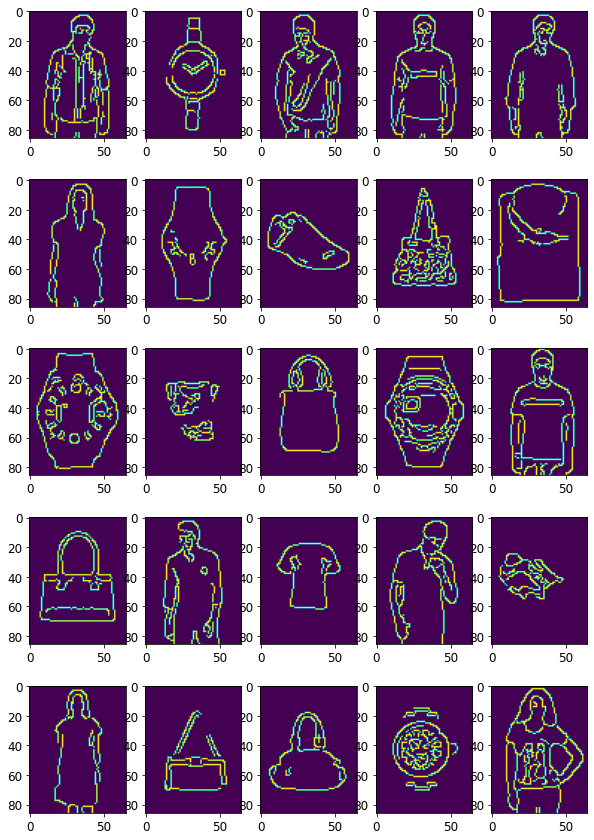

In [219]:
PlotSquareList(imgs_edges, 5)

Let's Run the classifier on this image

In [220]:
def CompareClassfiers(transformed_X,transformed_Y):
    transformed_X = np.dot(transformed_X,1/255)

    X_train, X_test, y_train, y_test = train_test_split(transformed_X,transformed_Y,test_size=0.2) 

    modelNB = GaussianNB()

    modelNB.fit(X_train, y_train)

    print('Accuracy with Naives Bayes : ',round(modelNB.score(X_test, y_test)*100,2),'%')
    print('')
    Rnd_Forest_clf = RandomForestClassifier(max_depth=2, random_state=0)
    Rnd_Forest_clf.fit(X_train, y_train)

    y_rnd_test_score = Rnd_Forest_clf.score(X_test, y_test)
    print('Accuracy random Forest Classifiers : ', round(y_rnd_test_score*100,2),'%')


In [221]:
CompareClassfiers(flat_edges,target_data)

Accuracy with Naives Bayes :  36.83 %

Accuracy random Forest Classifiers :  38.33 %


* Previous Score

<font color="darkblue">As we can see, the process didnt made any impact on the naives bayes and the Forest Classifiers</font>

<font color="darkblue">We need to try another methode to check if the results are better</font>

 <h3><font color='darkred'>Shape increasing by dilation process</font></h3>

<font color="darkblue">The erosion and dilatation process is a way to retract an expand some pixels zone in images. This process is really useful to increase the shape size or reduce noise.</font>

<font color="darkblue">In our case we will use dilatation to increase edge width</font>

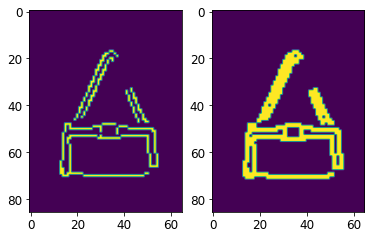

In [222]:
fig, axs = plt.subplots(1, 2)
kernel = np.ones((2,2),np.uint8)
axs[1].imshow(cv2.dilate(arrTarg4[3],kernel,iterations = 1))
axs[0].imshow(np.array(arrTarg4[3]))

<font color="darkblue">The first result with the demo image shape</font>

In [223]:
imgs_dilate, flat_diate = [], [] 
count_edge = 0
for imgs in imgs_edges:        
    edges = cv2.dilate(imgs,kernel,iterations = 1) # Canny Edge Detection
    flat_diate.append(edges.ravel())
    imgs_dilate.append(edges)
    string_print = dispPerc(count_edge,len(imgs_edges))
    count_edge += 1
    if count_edge % 100 == 0 or count_edge == len(imgs_edges):
        print(string_print, end="\r")


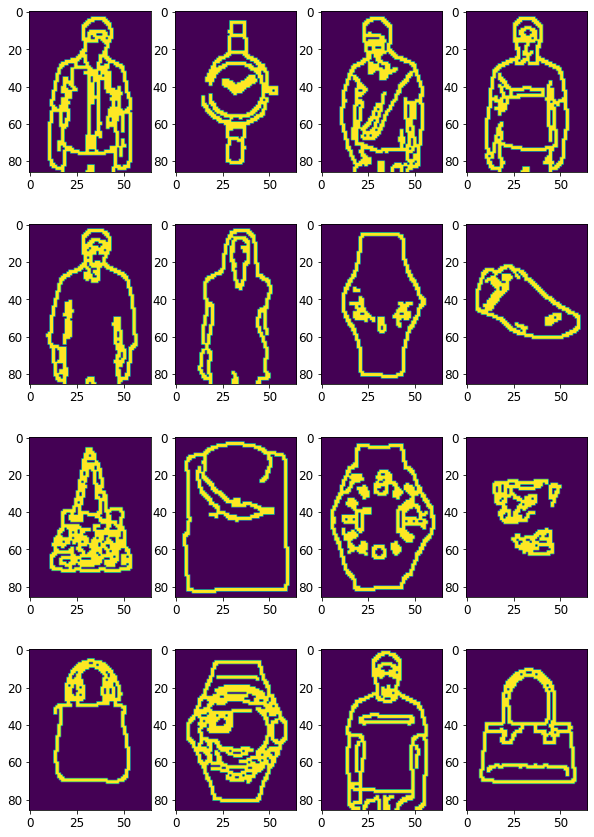

In [224]:
PlotSquareList(imgs_dilate, 4)

In [225]:
CompareClassfiers(flat_diate, target_data)

Accuracy with Naives Bayes :  32.63 %

Accuracy random Forest Classifiers :  42.79 %


<font color="darkblue">The process didn't made a huge change but did a better job than the previous one with 10% increase with the classifier</font>

<font color="darkblue">Again we need to try another methode to check if the results are better</font>

 <h3><font color='darkred'>Edge Enhancement with Sobel operator </font></h3>

<font color="darkblue">Previously we noticed that the edge shape increase did a better job with classifier</font>

<font color="darkblue">Enhance the edge and keeping the texture may have some benefit for the classifier algorythm</font>

Enahnce the edge Keep the image texture which was missing previously

The Sobel operator was designed for several purposes :
* Designed to detect edges along specific direction.
* Multiple instances (for various directions) are often combined for better results

In [226]:
# Sobel Edge Detection
img_gray = images_arr[target_nb]
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

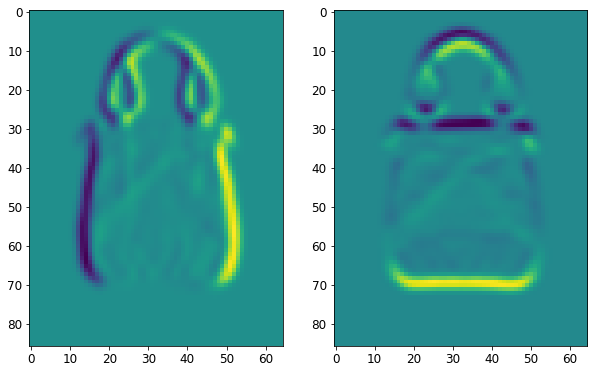

In [227]:
fig, axs = plt.subplots(1, 2,figsize=(10, 15))
axs[0].imshow(sobelx)
axs[1].imshow(sobely)
# axs[0, 0].set_title('Axis [0, 0]')

<font color="darkblue">This is the first result with sobel operator in X and Y direction</font>

In [228]:
imgs_sobel, flat_sobel = [], [] 
count_edge = 0
for imgs in images_arr:
    img_blur = cv2.GaussianBlur(imgs, (3,3), 0)         
    sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
    flat_sobel.append(sobelx.ravel())
    imgs_sobel.append(sobelx)
    string_print = dispPerc(count_edge,len(images_arr))
    count_edge += 1
    if count_edge % 100 == 0 or count_edge == len(images_arr):
        print(string_print, end="\r")


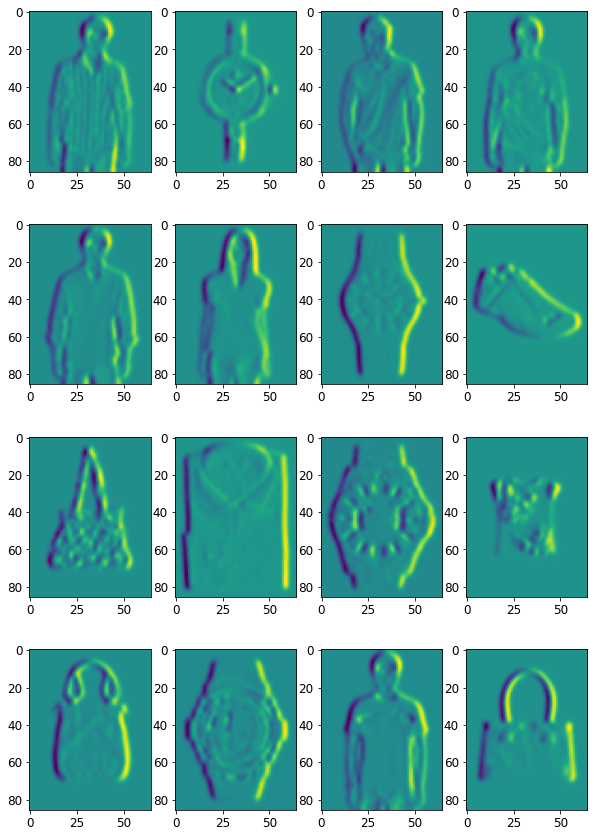

In [229]:
PlotSquareList(imgs_sobel, 4)

In [230]:
CompareClassfiers(flat_sobel,target_data)

Accuracy with Naives Bayes :  40.73 %

Accuracy random Forest Classifiers :  49.23 %


<font color="darkblue">As we can see, the process increase the result with the Naives Bayes but did changed what we expected with the classifier with more than 15% more accuracy </font>

<font color="darkblue">We need to try another methode to check if the results are better</font>

<h3><font color='darkred'>Image threshold binarization </font></h3>

<font color="darkblue"> We now try another technique fo binarisation, which is a gradient threshold bonarisation by keeping grayscale closer to binarisation</font>

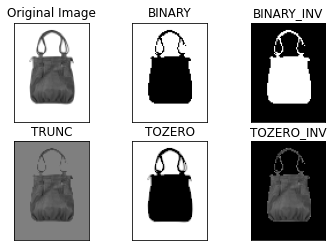

In [232]:
img = images_arr[target_nb] 
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

<font color="darkblue"> Here is the 5 differents technique of binarisation</font>

In [233]:
imgs_bin, flat_bin, img_false = [], [], []
count_edge = 0
for imgs in images_arr:      
    ret, img_bin = cv2.threshold(imgs,127,255,cv2.THRESH_TOZERO)
    ret, img_fal = cv2.threshold(imgs,127,255,cv2.THRESH_BINARY_INV)
    img_false.append(img_fal)
    flat_bin.append(img_bin.ravel())
    imgs_bin.append(img_bin)
    string_print = dispPerc(count_edge,len(images_arr))
    count_edge += 1
    if count_edge % 100 == 0 or count_edge == len(images_arr):
        print(string_print, end="\r")


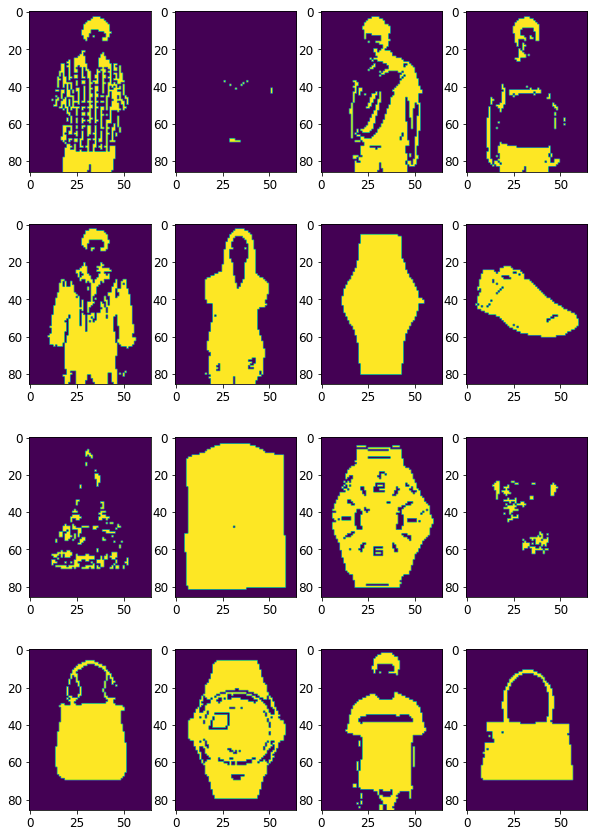

In [234]:
PlotSquareList(img_false, 4)

<font color="darkblue">If we use a complete binrisation, we can see that some shape may be disapear</font>

<font color="darkblue">Therefore, this will not be anymore a good pre-processing because we loose important data in this treatment</font>

<font color="darkblue">We need to apply one of the other techniques of binarisation</font>

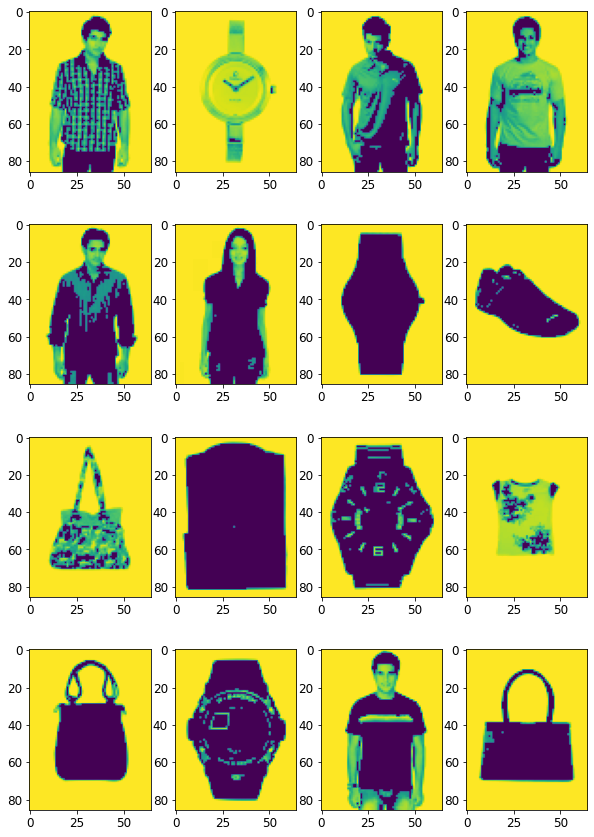

In [235]:
PlotSquareList(imgs_bin, 4)

<font color="darkblue">This techniques fitted more than the previous one, because we reduced again the dimension, the images are not fully binary but simplied enought to have different results </font>

In [236]:
CompareClassfiers(flat_bin,target_data)

Accuracy with Naives Bayes :  36.91 %

Accuracy random Forest Classifiers :  53.74 %


<font color="darkblue">We ended up with a 20% increase in the Random Forest Classifier which is a really good increase, even if it's still not enought to compete with neural network</font>

<font color="darkblue">We need again to try another process to try to find better result for our process</font>

 <h3><font color='darkred'>Image Enhancement by Edge detection and grayscale fusion </font></h3>

<font color="darkblue">For the last try, I was think about a combination step of the previous results we had</font>

<font color="darkblue">I tried to figure out : if I enhance the edge in our grayscale image will this combine all the results we had</font>

<font color="darkblue">This technique will keep the texture of the image but also mark all the edge with a fixed binary value</font>

I decided to multiply the edge image matrice with the grayscale image matrice

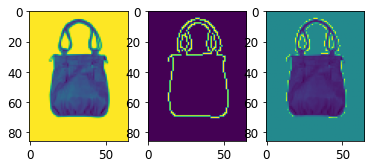

In [237]:
img_en = np.multiply(np.add(np.dot(imgs_edges[target_nb],1/255),1), images_arr[target_nb])
img_en = np.dot(img_en, 1/255)

fig, axs = plt.subplots(1, 3)
axs[0].imshow(images_arr[target_nb])
axs[1].imshow(imgs_edges[target_nb])
axs[2].imshow(img_en)


<font color="darkblue">We ended up with the last image which is the perfect combination of our grayscale image and the edge extracted with canny</font>

In [238]:
imgs_edgeEn, flat_edgeEn = [], [] 
count_img = 0
for imgs in imgs_edges:        
    new_img = np.multiply(np.add(np.dot(imgs,1/255),1), images_arr[count_img])
    new_img = np.multiply(1/255,new_img)
    flat_edgeEn.append(new_img.ravel())
    imgs_edgeEn.append(new_img)
    string_print = dispPerc(count_img,len(imgs_edges))
    count_img += 1
    if count_img % 100 == 0 or count_img == len(imgs_edges):
        print(string_print, end="\r")


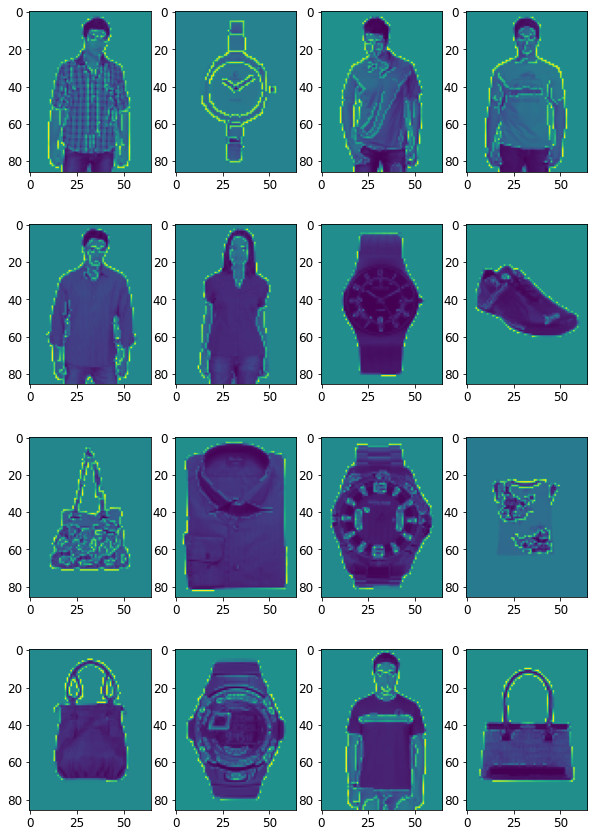

In [239]:
PlotSquareList(imgs_edgeEn, 4)

In [240]:
CompareClassfiers(flat_edgeEn,target_data)

Accuracy with Naives Bayes :  41.48 %

Accuracy random Forest Classifiers :  50.23 %


<font color="darkblue">Surprise or not, we ended up with the best results of our 5 pre_processing techniques</font>

<font color="darkblue">With 10-20 % increase in each classifer alogorythm, this a really satisfing try</font>

<font color="darkblue">Let's try to run our new output array into the Neural Network to see if we obtain any other performance increase</font>

In [241]:
X_train, X_test, y_train, y_test = train_test_split(flat_edgeEn,target_data,test_size=0.2) 

In [242]:
X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)

In [243]:
X_new_train, X_new_test = X_train.tolist(), X_test.tolist()
X_new_train, X_new_test = np.array(X_new_train, dtype=np.float), np.array(X_new_test, dtype=np.float)

C:\Users\Augustin\AppData\Local\Temp/ipykernel_9576/2653697359.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_new_train, X_new_test = np.array(X_new_train, dtype=np.float), np.array(X_new_test, dtype=np.float)


You can also pass a list of layers when creating the Sequential model:

In [244]:
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [245]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", #"sgd" simply means that we will train the model using simple Stochastic Gradient Descent
              metrics=["accuracy"])

In [246]:
history = model.fit(X_new_train, y_train, epochs=20,
                    validation_data=(X_new_test, y_test))

Epoch 1/20
573/573 [==============================] - 7s 11ms/step - loss: 1.2838 - accuracy: 0.5123 - val_loss: 1.0516 - val_accuracy: 0.5320
Epoch 2/20
573/573 [==============================] - 6s 11ms/step - loss: 0.8289 - accuracy: 0.6620 - val_loss: 1.0298 - val_accuracy: 0.5656
Epoch 3/20
573/573 [==============================] - 6s 10ms/step - loss: 0.7208 - accuracy: 0.7069 - val_loss: 0.6666 - val_accuracy: 0.7271
Epoch 4/20
573/573 [==============================] - 6s 10ms/step - loss: 0.6578 - accuracy: 0.7396 - val_loss: 0.5641 - val_accuracy: 0.7808
Epoch 5/20
573/573 [==============================] - 6s 10ms/step - loss: 0.6139 - accuracy: 0.7580 - val_loss: 0.6733 - val_accuracy: 0.7402
Epoch 6/20
573/573 [==============================] - 6s 10ms/step - loss: 0.5845 - accuracy: 0.7654 - val_loss: 0.6828 - val_accuracy: 0.7365
Epoch 7/20
573/573 [==============================] - 6s 10ms/step - loss: 0.5592 - accuracy: 0.7743 - val_loss: 0.5594 - val_accuracy: 0.7776

In [247]:
NNscore = model.evaluate(X_new_test, y_test) # now finally time to evaluate your model on the testing set
print('Accuracy with Neural Network : ', round(NNscore[1]*100,2),'%')

144/144 [==============================] - 1s 6ms/step - loss: 0.6317 - accuracy: 0.7590
Accuracy with Neural Network :  75.9 %


<font color="darkblue">After we run the Neural Network with our proceed array, the results were a bit disappointed of the result which are identical and even a bit worst that the one with the perceptron.</font>

 <h3><font color='darkred'> Conclusions  </font></h3>

<font color="darkblue">As a conclusion I would say that a good image processing can increase performance in some algorithm. We noticed that some process has more benefits than other in Classifier or in Naives Bayes.</font>

<font color="darkblue">We also noticed that if we combined some pre-processing the result might be significantly better in both machine learning technique.</font>

<font color="darkblue">However, any pre-processing beat the result of the convolutional neural network. As Naives Bayes and Random Forest are computationally less expensive than the CNN, it ‘a good field of research to improve algorithm results. There is so many types and way to do pre-processing that we could have done a whole portfolio on it.</font>

<font color="darkblue">Even if the results are not incredible, I found it satisfying that I researched in a good way and achieved to improve the result after each processing to gain accuracy in every classifier.</font>

# Portfolio Conclusion

<font color="darkblue">This first step into machine learning was a really good experience since I was so intereced by this new course.</font>

<font color="darkblue">I realized that week after week my dataset was really challenging because of its variety of pictures, image sizes and number of classes.</font>

<font color="darkblue">After all I didn't regret the choice of an image dataset because this learned me a lot on either image processing and how machine learning algorithm that we can see in every day life, works.</font>

<font color="darkblue">With really bad start result, with the starters classifier, I went to the point where the neural networks achieved accuracy around 90% at the end of this portfolio.</font>

<font color="darkblue">In the research question, even If didn't achieved better results on the neural network, I really enjoyed the pre-processing part when I tried to figure out difference technique and images manipulation in order to increase the accuracy of the algorithms.</font>

<font color="darkblue">All in all, we can conclude that in my dataset, nothing can beat the 90% efficiency of the Convolutional Neural Network even if it require a huge amount of data and its computationally expensive.</font>